# I. Analysis of Transformer models

A [transformer]((https://blogs.nvidia.com/blog/what-is-a-transformer-model/)) is a deep learning architecture developed by Google and based on the multi-head attention mechanism, proposed in a 2017 paper "Attention Is All You Need".

#### Resources
- [Download datasets.csv](https://github.com/esept/SDD_projet/blob/main/Ori_Data/datasets.csv)
- [Download df_10.csv](https://github.com/esept/SDD_projet/blob/main/Ori_Data/df_10.csv)
- [Download pp_data.csv](https://github.com/esept/SDD_projet/blob/main/src/data_preprocess/pp_data.csv)
- [Download clean_data.csv](https://github.com/esept/SDD_projet/blob/main/src/data_cleanup/clean_data.csv)

## II. Data Preprocess
- The main goal is to change unusable data to usable data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("../Ori_Data/df_10.csv")
df.head()

,Name,Create_Time,Last_Modified,private,gated,Disabled,Downloads,likes,Library_Name,Tags,Pipeline_tag,mask_token,Card_data,Widget_data,model_index,config,transformers_info,siblings,Spaces
0,albert/albert-base-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,74335,4,transformers,"['transformers', 'pytorch', 'tf', 'safetensors...",fill-mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,albert/albert-base-v2,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,2855580,75,transformers,"['transformers', 'pytorch', 'tf', 'jax', 'rust...",fill-mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,albert/albert-large-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,1491,0,transformers,"['transformers', 'pytorch', 'tf', 'albert', 'f...",fill-mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,albert/albert-large-v2,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,6875,12,transformers,"['transformers', 'pytorch', 'tf', 'safetensors...",fill-mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,albert/albert-xlarge-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,1449,1,transformers,"['transformers', 'pytorch', 'tf', 'safetensors...",fill-mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### a. Remove all unused characteres in Tags
去掉 tags 中的无效字符

In [3]:
df['Tags'] = df['Tags'].str.replace("'","").str.replace("[","").str.replace("]","") # 清理 tags 中的无效字符

In [4]:
df.head()

,Name,Create_Time,Last_Modified,private,gated,Disabled,Downloads,likes,Library_Name,Tags,Pipeline_tag,mask_token,Card_data,Widget_data,model_index,config,transformers_info,siblings,Spaces
0,albert/albert-base-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,74335,4,transformers,"transformers, pytorch, tf, safetensors, albert...",fill-mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,albert/albert-base-v2,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,2855580,75,transformers,"transformers, pytorch, tf, jax, rust, safetens...",fill-mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,albert/albert-large-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,1491,0,transformers,"transformers, pytorch, tf, albert, fill-mask, ...",fill-mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,albert/albert-large-v2,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,6875,12,transformers,"transformers, pytorch, tf, safetensors, albert...",fill-mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,albert/albert-xlarge-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,1449,1,transformers,"transformers, pytorch, tf, safetensors, albert...",fill-mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### b. Reformat tags with `:`
转换带有冒号`:`的标签

In [5]:
ff = ['base_model', 'license', 'adapterhub', 'template', 'inference', 'region', 'dataset', 'arxiv', 'pipeline', 'diffusers', 'doi']

In [6]:
for i in ff:
    name = "nb_" + i
    df[name] = df['Tags'].str.count(i + ":")

In [7]:
df.head()

,Name,Create_Time,Last_Modified,private,gated,Disabled,Downloads,likes,Library_Name,Tags,...,nb_license,nb_adapterhub,nb_template,nb_inference,nb_region,nb_dataset,nb_arxiv,nb_pipeline,nb_diffusers,nb_doi
0,albert/albert-base-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,74335,4,transformers,"transformers, pytorch, tf, safetensors, albert...",...,1,0,0,0,1,2,1,0,0,0
1,albert/albert-base-v2,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,2855580,75,transformers,"transformers, pytorch, tf, jax, rust, safetens...",...,1,0,0,0,1,2,1,0,0,0
2,albert/albert-large-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,1491,0,transformers,"transformers, pytorch, tf, albert, fill-mask, ...",...,1,0,0,0,1,2,1,0,0,0
3,albert/albert-large-v2,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,6875,12,transformers,"transformers, pytorch, tf, safetensors, albert...",...,1,0,0,0,1,2,1,0,0,0
4,albert/albert-xlarge-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,1449,1,transformers,"transformers, pytorch, tf, safetensors, albert...",...,1,0,0,0,1,2,1,0,0,0


In [8]:
ntags = []
for i in df['Tags']:
    tt = []
    tags = i.split(", ")
    for tag in tags:
        if ':' not in tag:
            tt.append(tag.lower())
    ntags.append(",".join(tt))
df['tags'] = ntags
# print(len(ntags))

In [9]:
df['tags'] # all tags without `:`

0        transformers,pytorch,tf,safetensors,albert,fil...
1        transformers,pytorch,tf,jax,rust,safetensors,a...
2        transformers,pytorch,tf,albert,fill-mask,en,au...
3        transformers,pytorch,tf,safetensors,albert,fil...
4        transformers,pytorch,tf,safetensors,albert,fil...
                               ...                        
44706    transformers,tensorboard,safetensors,vit,image...
44707    transformers,safetensors,mistral,text-generati...
44708    transformers,safetensors,mistral,text-generati...
44709    ml-agents,tensorboard,onnx,huggy,deep-reinforc...
44710                                     peft,safetensors
Name: tags, Length: 44711, dtype: object

#### c. Count number of presents tags

In [10]:
dttags = {}
for i in df['tags']:
    tags = i.split(',')
    for tag in tags:
        if tag not in dttags:
            dttags[tag] = 1
        else:
            dttags[tag] += 1

In [11]:
print(len(dttags))

5340


#### d. Transfer all framework tags

In [ ]:
# # len(dttags)

with open("tags.txt","w+") as f:
    for i in dtt:
        f.write(str(i) + "\n")

In [ ]:
dtt = sorted(dttags.items(),key = lambda x:x[1],reverse = True)

In [ ]:
ff = ['torch','jax','onnx','tensorflow','keras']
for i in ff:
    name = "framework_" + i
    df[name] = df['tags'].str.count(i)

In [ ]:
nt = []
ltf = df['framework_tensorflow'].tolist() 

for i in range(len(df['tags'])):
    tt = []  
    tags = df['tags'].iloc[i].split(',')
    
    for tag in tags:
        if tag == "tf" or tag == "tflite":
            ltf[i] = 1 
        elif not any(f in tag for f in ff):  
            tt.append(tag)
    nt.append(','.join(tt))

df['framework_tensorflow'] = ltf  
df['newtags'] = nt  


In [ ]:
df['framework_tensorflow'] = ltf

In [ ]:
dttags = {}
for i in df['newtags']:
    tags = i.split(',')
    for tag in tags:
        if tag not in dttags:
            dttags[tag] = 1
        else:
            dttags[tag] += 1
dtt = sorted(dttags.items(),key = lambda x:x[1],reverse = True)
len(dtt)

5323

In [ ]:
df.head()

,Name,Create_Time,Last_Modified,private,gated,Disabled,Downloads,likes,Library_Name,Tags,...,nb_pipeline,nb_diffusers,nb_doi,tags,framework_torch,framework_jax,framework_onnx,framework_tensorflow,framework_keras,newtags
0,albert/albert-base-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,74335,4,transformers,"transformers, pytorch, tf, safetensors, albert...",...,0,0,0,"transformers,pytorch,tf,safetensors,albert,fil...",1,0,0,1,0,"transformers,safetensors,albert,fill-mask,exbe..."
1,albert/albert-base-v2,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,2855580,75,transformers,"transformers, pytorch, tf, jax, rust, safetens...",...,0,0,0,"transformers,pytorch,tf,jax,rust,safetensors,a...",1,1,0,1,0,"transformers,rust,safetensors,albert,fill-mask..."
2,albert/albert-large-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,1491,0,transformers,"transformers, pytorch, tf, albert, fill-mask, ...",...,0,0,0,"transformers,pytorch,tf,albert,fill-mask,en,au...",1,0,0,1,0,"transformers,albert,fill-mask,en,autotrain_com..."
3,albert/albert-large-v2,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,6875,12,transformers,"transformers, pytorch, tf, safetensors, albert...",...,0,0,0,"transformers,pytorch,tf,safetensors,albert,fil...",1,0,0,1,0,"transformers,safetensors,albert,fill-mask,en,a..."
4,albert/albert-xlarge-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,1449,1,transformers,"transformers, pytorch, tf, safetensors, albert...",...,0,0,0,"transformers,pytorch,tf,safetensors,albert,fil...",1,0,0,1,0,"transformers,safetensors,albert,fill-mask,en,a..."


#### e. Remove all model's tag 

In [ ]:
mt = ['bert','gpt','net','roombaatob','llama','t5','yolo','gan','timm','bart','mistral','whisper','marian']
n = 0
for i in dttags:
    for m in mt :
        if m in i :
            n += 1
#             print(i)
n

571

In [ ]:
df['newtags'][1]

'transformers,rust,safetensors,albert,fill-mask,en,autotrain_compatible,endpoints_compatible'

In [ ]:
bms = [] # base model tag
tbm = [] # tag without base model
nb = []
for i in df['newtags']:
    tags = i.split(',')
    ms = [] # base model tag for single model
    tg = [] # tag without base model for single model
    n = 0
    for tag in tags:
        if not any(m in tag for m in mt):
            ms.append(tag)
        else:
            tg.append(tag)
            n += 1
    
    tbm.append(','.join(tg))    
    bms.append(','.join(ms))
    nb.append(n)
# df['base_models'] = bms

In [ ]:
df['base_models'] = tbm
df['NB_Base_models'] = nb
df['tags'] = bms

In [ ]:
df['tags']

0        transformers,safetensors,fill-mask,en,autotrai...
1        transformers,rust,safetensors,fill-mask,en,aut...
2        transformers,fill-mask,en,autotrain_compatible...
3        transformers,safetensors,fill-mask,en,autotrai...
4        transformers,safetensors,fill-mask,en,autotrai...
                               ...                        
44706    transformers,tensorboard,safetensors,vit,image...
44707    transformers,safetensors,text-generation,merge...
44708    transformers,safetensors,text-generation,autot...
44709    ml-agents,tensorboard,huggy,deep-reinforcement...
44710                                     peft,safetensors
Name: tags, Length: 44711, dtype: object

In [ ]:
df['base_models']

0        albert,exbert
1               albert
2               albert
3               albert
4               albert
             ...      
44706                 
44707          mistral
44708          mistral
44709                 
44710                 
Name: base_models, Length: 44711, dtype: object

In [ ]:
df.iloc[1]

Name                                                albert/albert-base-v2
Create_Time                                     2022-03-02 23:29:04+00:00
Last_Modified                                                         NaN
private                                                             False
gated                                                                 NaN
Disabled                                                              NaN
Downloads                                                         2855580
likes                                                                  75
Library_Name                                                 transformers
Tags                    transformers, pytorch, tf, jax, rust, safetens...
Pipeline_tag                                                    fill-mask
mask_token                                                            NaN
Card_data                                                             NaN
Widget_data                           

#### f. Remove all language tags

In [ ]:
# langtags = [] # base model tag
# newt = [] # tag without base model
# for i in df['tags']:
#     tags = i.split(',')
#     lt = [] # base model tag for single model
#     nt = [] # tag without base model for single model
#     for tag in tags:
#         if not any(m in tag for m in mt):
#             ms.append(tag)
#         else:
#             tg.append(tag)
    
#     tbm.append(','.join(tg))    
#     bms.append(','.join(ms))
# # df['base_models'] = bms

In [ ]:
def clean_tags_in(col_name,taglist):
    rt1 = [] # 剩余的内容
    rt2 = [] # 选择出的内容
    nb = []
    for i in df[col_name]:
        tags = i.split(',')
        t1 = []
        t2 = []
        n = 0
        for tag in tags:
            if not any(t in tag for t in taglist):
                t1.append(tag)
            else:
                t2.append(tag)
                n += 1
        rt1.append(','.join(t1))
        rt2.append(','.join(t2))
        nb.append(n)
    return rt1,rt2,nb

In [ ]:
lang1 = [
    'multilingual',
    'english',
    'chinese',
    'german',
    'afrikaans',
    'albanian',
    'arabic',
    'aragonese',
    'armenian',
    'asturian',
    'azerbaijani',
    'bashkir',
    'basque',
    'bavarian german',
    'belarusian',
    'bengali',
    'bosnian',
    'breton',
    'bulgarian',
    'burmese',
    'catalan',
    'cebuano',
    'chechen',
    'chuvash',
    'croatian',
    'czech',
    'danish',
    'dutch',
    'estonian',
    'finnish',
    'french',
    'galician',
    'georgian',
    'greek',
    'gujarati',
    'haitian creole',
    'hebrew',
    'hindi',
    'hungarian',
    'icelandic',
    'interlingua',
    'indonesian',
    'irish',
    'italian',
    'japanese',
    'javanese',
    'kannada',
    'kazakh',
    'kyrgyz',
    'korean',
    'latin',
    'latvian',
    'lithuanian',
    'neapolitan',
    'low german',
    'lomwe',
    'macedonian',
    'malagasy',
    'malay',
    'malayalam',
    'marathi',
    'mongolian',
    'min nan chinese',
    'nepali',
    'norwegian bokmål',
    'norwegian nynorsk',
    'occitan',
    'persian',
    'piedmontese',
    'polish',
    'portuguese',
    'punjabi',
    'romanian',
    'russian',
    'scottish gaelic',
    'serbian',
    'sicilian',
    'slovak',
    'slovene',
    'azerbaijani (latin script)',
    'spanish',
    'sundanese',
    'swahili',
    'swedish',
    'tagalog',
    'tajik',
    'thai',
    'tamil',
    'tatar',
    'telugu',
    'turkish',
    'ukrainian',
    'urdu (latin script)',
    'uzbek',
    'vietnamese',
    'volapük',
    'waray-waray',
    'welsh',
    'western frisian',
    'punjabi (shahmukhi script)',
    'yoruba',
    'norwegian nynorsk',
    'esperanto',
    'serbo-croatian',
    'egyptian arabic',
    'old english',
    'urdu (perso-arabic script)',
    'alsatian',
    'wu chinese',
    'luxembourgish',
    'sinhala',
    'kurdish',
    'kurdish (sorani script)',
    'interlingua',
    'yiddish',
    'western frisian',
    'gan chinese',
    'amharic',
    'assamese',
    'scottish gaelic',
    'hausa',
    'khmer',
    'lao',
    'oromo',
    'oriya',
    'pashto',
    'sanskrit',
    'sindhi',
    'somali',
    'uyghur',
    'xhosa'
]
lang2 = ['en','zh','de','af', 'sq', 'ar','an', 'hy', 'ast', 'az', 'ba','eu', 'bar', 'be', 'bn', 'inc','bs', 'br', 'bg', 'my', 'ca', 'ceb', 'ce', 'cv', 'hr', 'cs', 'da', 'nl', 'et', 'fi', 'fr', 'gl', 'ka', 'el', 'gu', 'ht', 'he', 'hi', 'hu', 'is', 'io', 'id', 'ga', 'it', 'ja', 'jv', 'kn', 'kk', 'ky', 'ko', 'la', 'lv', 'lt', 'roa', 'nds', 'lm', 'mk', 'mg', 'ms', 'ml', 'mr', 'mn', 'min', 'ne', 'new', 'nb', 'nn', 'oc', 'fa', 'pms', 'pl', 'pt', 'pa', 'ro', 'ru', 'sco', 'sr', 'scn', 'sk', 'sl', 'aze', 'es', 'su', 'sw', 'sv', 'tl', 'tg', 'th', 'ta', 'tt', 'te', 'tr', 'uk', 'ud', 'uz', 'vi', 'vo', 'war', 'cy', 'fry', 'pnb', 'yo','no', 'eo', 'sh', 'arz', 'ang', 'ur', 'als', 'wuu', 'lb', 'si', 'ku', 'ckb', 'ia', 'yi', 'fy', 'gan', 'am', 'gd', 'ha', 'km', 'lo', 'om', 'or', 'ps', 'sa', 'sd', 'so', 'ug', 'xh']


In [ ]:
lt1,lt2,nblt = clean_tags_in("tags",lang1)

In [ ]:
df['langs'] = lt2

In [ ]:
def clean_tags_equal(col_name,taglist):
    rt1 = [] # 剩余的内容
    rt2 = [] # 选择出的内容
    nb = []
    for i in df[col_name]:
        tags = i.split(',')
        t1 = []
        t2 = []
        n = 0
        for tag in tags:
            if not any(t == tag for t in taglist):
                t1.append(tag)
            else:
                t2.append(tag)
                n += 1
        rt1.append(','.join(t1))
        rt2.append(','.join(t2))
        nb.append(n)
    return rt1,rt2,nb

In [ ]:
lt1,lt2,nblt2 = clean_tags_equal("tags",lang2)

In [ ]:
lls = df['langs'].tolist()
lls = [(l + "," + t) for l,t in zip(lls,lt2)]

In [ ]:
df['langs'] = lls
nblang = [(i + j) for i,j in zip(nblt,nblt2)]
df['NB_Lang'] = nblang
df['newtags'] = lt1

In [ ]:
df['newtags']

0        transformers,safetensors,fill-mask,autotrain_c...
1        transformers,rust,safetensors,fill-mask,autotr...
2        transformers,fill-mask,autotrain_compatible,en...
3        transformers,safetensors,fill-mask,autotrain_c...
4        transformers,safetensors,fill-mask,autotrain_c...
                               ...                        
44706    transformers,tensorboard,safetensors,vit,image...
44707    transformers,safetensors,text-generation,merge...
44708    transformers,safetensors,text-generation,autot...
44709    ml-agents,tensorboard,huggy,deep-reinforcement...
44710                                     peft,safetensors
Name: newtags, Length: 44711, dtype: object

#### g. Remove all tasks tags

In [ ]:
tasks = ['text','image','vision','classi','medical','speech','translation','recognition','voice','model',
        'agent','video','generation','question','answer','argument','audio','detect','sentiment','photo',
       'evalu','vit','3d','2d','llm','mask','emotion','design','conversation','language','diffu','stable',
       'correction','document','math','correct','face','chat','codegen','pix','sentence','estimation','painting',
        'generate','alignment','dialogue','extraction','segment','verif','semantic','wav2vec2','summarization','learning','huggy',
        'snowballtarget','pertraining','clip',]

In [ ]:
taskt1,taskt2,nb_task = clean_tags_in("newtags",tasks)

In [ ]:
df['tasks'] = taskt2
df['NB_tasks'] = nb_task

In [ ]:
df['tags'] = taskt1

#### h. Remove all 'transformer' tags

In [ ]:
tfrs = ['transformer']

In [ ]:
tf1,tf2,_ = clean_tags_in("tags",tfrs)

In [ ]:
df['transformers'] = tf2

In [ ]:
df['newtags'] = tf1

#### i. Remove techs tags

In [ ]:
techs = ['lora','fine','tune','embedding','bit','pyramids','merge']

In [ ]:
tec1,tec2,nb_tech = clean_tags_in("newtags",techs)

In [ ]:
df['tags'] = tec1
df['techs'] = tec2
df['NB_techs'] = nb_tech

#### j. Remove size tags

In [ ]:
sizes = ['7b','13b','70b','xl','8b','13b','mega','large','base','small','tiny']

In [ ]:
sz1,sz2,_ = clean_tags_in("tags",sizes)

In [ ]:
df['size'] = sz2
df['newtags'] = sz1

#### k. Create One-hot-tag

In [ ]:
def onehot_tag(col_name,tags):
    for tag in tags:
        name = "ONEHOT_" + tag
        df[name] = df[col_name].str.count(tag)

In [ ]:
single_one_hot_tag = [
    'endpoints_compatible',
    'autotrain_compatible',
    'safetensors',
    'tensorboard',
    'has_space'
]

In [ ]:
onehot_tag('newtags',single_one_hot_tag)

In [ ]:
df.iloc[0]

Name                                                       albert/albert-base-v1
Create_Time                                            2022-03-02 23:29:04+00:00
Last_Modified                                                                NaN
private                                                                    False
gated                                                                        NaN
Disabled                                                                     NaN
Downloads                                                                  74335
likes                                                                          4
Library_Name                                                        transformers
Tags                           transformers, pytorch, tf, safetensors, albert...
Pipeline_tag                                                           fill-mask
mask_token                                                                   NaN
Card_data                   

In [ ]:
df.columns

Index(['Name', 'Create_Time', 'Last_Modified', 'private', 'gated', 'Disabled',
       'Downloads', 'likes', 'Library_Name', 'Tags', 'Pipeline_tag',
       'mask_token', 'Card_data', 'Widget_data', 'model_index', 'config',
       'transformers_info', 'siblings', 'Spaces', 'nb_base_model',
       'nb_license', 'nb_adapterhub', 'nb_template', 'nb_inference',
       'nb_region', 'nb_dataset', 'nb_arxiv', 'nb_pipeline', 'nb_diffusers',
       'nb_doi', 'tags', 'framework_torch', 'framework_jax', 'framework_onnx',
       'framework_tensorflow', 'framework_keras', 'newtags', 'base_models',
       'NB_Base_models', 'langs', 'NB_Lang', 'tasks', 'NB_tasks',
       'transformers', 'techs', 'NB_techs', 'size',
       'ONEHOT_endpoints_compatible', 'ONEHOT_autotrain_compatible',
       'ONEHOT_safetensors', 'ONEHOT_tensorboard', 'ONEHOT_has_space'],
      dtype='object')

#### l. Create ONE-HOT language tag
Create one-hot language tag for 
- english - en
- french - fr
- chinese - zh
- arabic - ar
- german - de
- spanish - es

In [ ]:
en = ['english','en']
fr = ['french','fr']
zh = ['chinese','zh']
ar = ['arabic','ar']
de = ['german','de']
es = ['spanish','es']
lang_tags = {'en':en,'fr':fr,'zh':zh,'ar':ar,'de':de,'es':es}

In [ ]:
for lang in lang_tags:
    name = 'NB_' + lang
    nb = []
    for i in df['langs']:
        n = 0
        tags = i.split(',')
        if any(tag in lang_tags[lang] for tag in tags):
          n = 1  
        nb.append(n)
    df[name] = nb

In [ ]:
df.iloc[0]

Name                                                       albert/albert-base-v1
Create_Time                                            2022-03-02 23:29:04+00:00
Last_Modified                                                                NaN
private                                                                    False
gated                                                                        NaN
Disabled                                                                     NaN
Downloads                                                                  74335
likes                                                                          4
Library_Name                                                        transformers
Tags                           transformers, pytorch, tf, safetensors, albert...
Pipeline_tag                                                           fill-mask
mask_token                                                                   NaN
Card_data                   

In [ ]:
df.to_csv("./data_preprocess/pp_data.csv",index = False)

## III. Preprocessed Data Cleaning

In [15]:
df_preprocessed = pd.read_csv("./data_preprocess/pp_data.csv")

#### a. Observation

In [17]:
# df_preprocessed.shape
# df_preprocessed.dtypes
df_preprocessed.head()

,Name,Create_Time,Last_Modified,private,gated,Disabled,Downloads,likes,Library_Name,Tags,...,ONEHOT_autotrain_compatible,ONEHOT_safetensors,ONEHOT_tensorboard,ONEHOT_has_space,NB_en,NB_fr,NB_zh,NB_ar,NB_de,NB_es
0,albert/albert-base-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,74335,4,transformers,"transformers, pytorch, tf, safetensors, albert...",...,1,1,0,0,1,0,0,0,0,0
1,albert/albert-base-v2,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,2855580,75,transformers,"transformers, pytorch, tf, jax, rust, safetens...",...,1,1,0,0,1,0,0,0,0,0
2,albert/albert-large-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,1491,0,transformers,"transformers, pytorch, tf, albert, fill-mask, ...",...,1,0,0,0,1,0,0,0,0,0
3,albert/albert-large-v2,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,6875,12,transformers,"transformers, pytorch, tf, safetensors, albert...",...,1,1,0,0,1,0,0,0,0,0
4,albert/albert-xlarge-v1,2022-03-02 23:29:04+00:00,NaN,False,NaN,NaN,1449,1,transformers,"transformers, pytorch, tf, safetensors, albert...",...,1,1,0,0,1,0,0,0,0,0


In [18]:
def get_missing_data(df):
    missing_values = df_preprocessed.isna().mean() * 100
    return missing_values.sort_values(ascending = False)

missing_values = get_missing_data(df_preprocessed)
print("Missing values in percentage (%)")
missing_values

Missing values in percentage (%)


Spaces                         100.000000
Widget_data                    100.000000
Last_Modified                  100.000000
gated                          100.000000
Disabled                       100.000000
siblings                       100.000000
transformers_info              100.000000
config                         100.000000
model_index                    100.000000
mask_token                     100.000000
Card_data                      100.000000
size                            99.033795
techs                           91.192324
base_models                     44.300060
transformers                    36.941692
Pipeline_tag                     8.617566
tasks                            4.321084
newtags                          1.695332
tags                             1.695332
Library_Name                     0.201293
NB_techs                         0.000000
NB_Base_models                   0.000000
langs                            0.000000
NB_Lang                          0

#### b. Drop columns with more than 50% missing values given that they are not crucial for the analysis:

In [19]:
threshold = 50
columns_to_drop = missing_values[missing_values > threshold].index
df_preprocessed.drop(columns=columns_to_drop, inplace=True)
df_preprocessed.columns

Index(['Name', 'Create_Time', 'private', 'Downloads', 'likes', 'Library_Name',
       'Tags', 'Pipeline_tag', 'nb_base_model', 'nb_license', 'nb_adapterhub',
       'nb_template', 'nb_inference', 'nb_region', 'nb_dataset', 'nb_arxiv',
       'nb_pipeline', 'nb_diffusers', 'nb_doi', 'tags', 'framework_torch',
       'framework_jax', 'framework_onnx', 'framework_tensorflow',
       'framework_keras', 'newtags', 'base_models', 'NB_Base_models', 'langs',
       'NB_Lang', 'tasks', 'NB_tasks', 'transformers', 'NB_techs',
       'ONEHOT_endpoints_compatible', 'ONEHOT_autotrain_compatible',
       'ONEHOT_safetensors', 'ONEHOT_tensorboard', 'ONEHOT_has_space', 'NB_en',
       'NB_fr', 'NB_zh', 'NB_ar', 'NB_de', 'NB_es'],
      dtype='object')

#### c. Rename / uniformize columns names

In [20]:
df_preprocessed.rename(columns={'Name': 'name', 'Create_Time': 'created_at', 'Downloads': 'downloads', 'Library_Name': 'library_name', 'Pipeline_tag': 'pipeline_tag'}, inplace = True)
df_preprocessed.columns

Index(['name', 'created_at', 'private', 'downloads', 'likes', 'library_name',
       'Tags', 'pipeline_tag', 'nb_base_model', 'nb_license', 'nb_adapterhub',
       'nb_template', 'nb_inference', 'nb_region', 'nb_dataset', 'nb_arxiv',
       'nb_pipeline', 'nb_diffusers', 'nb_doi', 'tags', 'framework_torch',
       'framework_jax', 'framework_onnx', 'framework_tensorflow',
       'framework_keras', 'newtags', 'base_models', 'NB_Base_models', 'langs',
       'NB_Lang', 'tasks', 'NB_tasks', 'transformers', 'NB_techs',
       'ONEHOT_endpoints_compatible', 'ONEHOT_autotrain_compatible',
       'ONEHOT_safetensors', 'ONEHOT_tensorboard', 'ONEHOT_has_space', 'NB_en',
       'NB_fr', 'NB_zh', 'NB_ar', 'NB_de', 'NB_es'],
      dtype='object')

#### d. Format columns names

In [21]:
extracted_name = df_preprocessed['name'].str.extract("([a-zA-Z0-9]+)[/](.*)")
extracted_name

,0,1
0,albert,albert-base-v1
1,albert,albert-base-v2
2,albert,albert-large-v1
3,albert,albert-large-v2
4,albert,albert-xlarge-v1
...,...,...
44706,mmervecerit,vit-base-beans-tutorial
44707,jsfs11,WildMBXMarconi-SLERP-7B
44708,PetroGPT,WestSeverus-7B-DPO
44709,tinywell,ppo-Huggy


In [22]:
df_preprocessed['model_name'] = extracted_name[0].astype(str)
df_preprocessed['model_version'] = extracted_name[1].astype(str)

# print(df_preprocessed['model_name'].isna().sum(), ',', df_preprocessed['model_version'].isna().sum())
df_preprocessed.head(2)

,name,created_at,private,downloads,likes,library_name,Tags,pipeline_tag,nb_base_model,nb_license,...,ONEHOT_tensorboard,ONEHOT_has_space,NB_en,NB_fr,NB_zh,NB_ar,NB_de,NB_es,model_name,model_version
0,albert/albert-base-v1,2022-03-02 23:29:04+00:00,False,74335,4,transformers,"transformers, pytorch, tf, safetensors, albert...",fill-mask,0,1,...,0,0,1,0,0,0,0,0,albert,albert-base-v1
1,albert/albert-base-v2,2022-03-02 23:29:04+00:00,False,2855580,75,transformers,"transformers, pytorch, tf, jax, rust, safetens...",fill-mask,0,1,...,0,0,1,0,0,0,0,0,albert,albert-base-v2


In [23]:
# df_preprocessed.duplicated().sum()
df_preprocessed['created_at'] = pd.to_datetime(df_preprocessed['created_at'])
df_preprocessed['created_at'] = df_preprocessed['created_at'].dt.date
df_preprocessed['created_at']

0        2022-03-02
1        2022-03-02
2        2022-03-02
3        2022-03-02
4        2022-03-02
            ...    
44706    2024-01-24
44707    2024-01-24
44708    2024-01-24
44709    2024-01-24
44710    2024-01-24
Name: created_at, Length: 44711, dtype: object

In [24]:
# df_preprocessed['private'].unique()
# df_preprocessed['private'].value_counts()
# df_preprocessed.drop(columns='private', inplace=True)

# df_preprocessed['downloads']
# df_preprocessed['likes']
# df_preprocessed["library_name"]
# df_preprocessed[["name", "library_name"]]

df_preprocessed.columns

Index(['name', 'created_at', 'private', 'downloads', 'likes', 'library_name',
       'Tags', 'pipeline_tag', 'nb_base_model', 'nb_license', 'nb_adapterhub',
       'nb_template', 'nb_inference', 'nb_region', 'nb_dataset', 'nb_arxiv',
       'nb_pipeline', 'nb_diffusers', 'nb_doi', 'tags', 'framework_torch',
       'framework_jax', 'framework_onnx', 'framework_tensorflow',
       'framework_keras', 'newtags', 'base_models', 'NB_Base_models', 'langs',
       'NB_Lang', 'tasks', 'NB_tasks', 'transformers', 'NB_techs',
       'ONEHOT_endpoints_compatible', 'ONEHOT_autotrain_compatible',
       'ONEHOT_safetensors', 'ONEHOT_tensorboard', 'ONEHOT_has_space', 'NB_en',
       'NB_fr', 'NB_zh', 'NB_ar', 'NB_de', 'NB_es', 'model_name',
       'model_version'],
      dtype='object')

#### f. cleanup Tags, tags, pipeline_tag

Delete library_name, tags, pipeline_tag and newtags as all the informations can be found in the Tags column

In [25]:
# df_preprocessed['tags'].isna().sum()
# df_preprocessed['tags'].iloc[0].isna().sum()
# df_preprocessed['tags'].iloc[1].isna().sum()

# df_preprocessed['Tags'].iloc[0]
# df_preprocessed.iloc[0]
# df_preprocessed['tags'].unique()

# df.shape
# df_preprocessed.dtypes.head(45)
df_preprocessed.drop(columns=['tags','pipeline_tag','newtags'], inplace=True)
df_preprocessed.columns

Index(['name', 'created_at', 'private', 'downloads', 'likes', 'library_name',
       'Tags', 'nb_base_model', 'nb_license', 'nb_adapterhub', 'nb_template',
       'nb_inference', 'nb_region', 'nb_dataset', 'nb_arxiv', 'nb_pipeline',
       'nb_diffusers', 'nb_doi', 'framework_torch', 'framework_jax',
       'framework_onnx', 'framework_tensorflow', 'framework_keras',
       'base_models', 'NB_Base_models', 'langs', 'NB_Lang', 'tasks',
       'NB_tasks', 'transformers', 'NB_techs', 'ONEHOT_endpoints_compatible',
       'ONEHOT_autotrain_compatible', 'ONEHOT_safetensors',
       'ONEHOT_tensorboard', 'ONEHOT_has_space', 'NB_en', 'NB_fr', 'NB_zh',
       'NB_ar', 'NB_de', 'NB_es', 'model_name', 'model_version'],
      dtype='object')

#### g. Modifing how name is printed
- Delete df_preprocessed['name'] (given that it can be obtained by using model_name and model_version)
- Moving model_name and model_version as the first and second columns

In [26]:
df_preprocessed.drop(columns='name', inplace=True)
def move_columns(df, column_to_move, desired_position):
    column_to_move_series = df.pop(column_to_move)
    df.insert(desired_position, column_to_move, column_to_move_series)

move_columns(df_preprocessed, 'model_name', 0)
move_columns(df_preprocessed, 'model_version', 1)

df_preprocessed.head(2)

,model_name,model_version,created_at,private,downloads,likes,library_name,Tags,nb_base_model,nb_license,...,ONEHOT_autotrain_compatible,ONEHOT_safetensors,ONEHOT_tensorboard,ONEHOT_has_space,NB_en,NB_fr,NB_zh,NB_ar,NB_de,NB_es
0,albert,albert-base-v1,2022-03-02,False,74335,4,transformers,"transformers, pytorch, tf, safetensors, albert...",0,1,...,1,1,0,0,1,0,0,0,0,0
1,albert,albert-base-v2,2022-03-02,False,2855580,75,transformers,"transformers, pytorch, tf, jax, rust, safetens...",0,1,...,1,1,0,0,1,0,0,0,0,0


In [27]:
df_preprocessed['langs'].value_counts()

langs
,         31901
,en        6145
,zh         391
,ko         365
,ja         231
          ...  
,ko,fi        1
,ko,hu        1
,ko,ru        1
,lt,de        1
,en,te        1
Name: count, Length: 1093, dtype: int64

In [28]:
def isunknow(lang):
    if lang == ',':
        return True
    else:
        return False
    
df_preprocessed['langs'].apply(lambda x: isunknow(x)).value_counts()

langs
True     31901
False    12810
Name: count, dtype: int64

#### h. Create a list of models differents languages, instead of a all-in-one string seperated by comma 

In [29]:
# df_preprocessed['langs'].str.replace(',', ' ').str.split().apply(lambda x: [i.strip() for i in x]).value_counts().index
# df_preprocessed['langs']

# print(df_preprocessed['langs'].dtype)
# df_preprocessed['langs'] = df_preprocessed['langs'].astype(str)
# df_preprocessed['langs'] = df_preprocessed['langs'].str.replace(',', ' ').str.split().apply(lambda x: [i.strip() for i in x])

# df_preprocessed['langs']

#### i. Drop not crucial columns which haven't interesting information

In [30]:
# df_preprocessed['private'].value_counts() # same value for all rows
# df_preprocessed['nb_license'].value_counts() # not useful 0, 1, 2 number of licenses
# df_preprocessed['nb_adapterhub'].value_counts() # not useful (a part 7 models, all are 0)
# df_preprocessed['nb_template'].value_counts() # nearly 90% have 0 templates
# df_preprocessed['nb_inference'].value_counts() # nearly 99% have 0 inferences
# df_preprocessed['nb_region'].value_counts() # all have 1 region
# df_preprocessed['nb_arxiv'].value_counts()?
# df_preprocessed['nb_pipeline'].value_counts() # nearly 99% have 0 pipelines
# df_preprocessed['nb_diffusers'].value_counts() # nearly 99% have 0 diffusers
# df_preprocessed['nb_doi'].value_counts() # nearly 99% have 0 dois
# df_preprocessed['nb_adapterhub'].value_counts() # nearly 99% have 0 dois

df_preprocessed.drop(columns=['private', 'Tags', 'nb_license', 'nb_adapterhub', 'nb_template', 'nb_inference', 'nb_region', 'nb_arxiv', 'nb_pipeline', 'nb_diffusers', 'nb_doi', 'nb_adapterhub'], inplace=True)
df_preprocessed

# OK for frameworks
# OK NB_
# OK ONEHOT_safetensors_

,model_name,model_version,created_at,downloads,likes,library_name,nb_base_model,nb_dataset,framework_torch,framework_jax,...,ONEHOT_autotrain_compatible,ONEHOT_safetensors,ONEHOT_tensorboard,ONEHOT_has_space,NB_en,NB_fr,NB_zh,NB_ar,NB_de,NB_es
0,albert,albert-base-v1,2022-03-02,74335,4,transformers,0,2,1,0,...,1,1,0,0,1,0,0,0,0,0
1,albert,albert-base-v2,2022-03-02,2855580,75,transformers,0,2,1,1,...,1,1,0,0,1,0,0,0,0,0
2,albert,albert-large-v1,2022-03-02,1491,0,transformers,0,2,1,0,...,1,0,0,0,1,0,0,0,0,0
3,albert,albert-large-v2,2022-03-02,6875,12,transformers,0,2,1,0,...,1,1,0,0,1,0,0,0,0,0
4,albert,albert-xlarge-v1,2022-03-02,1449,1,transformers,0,2,1,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44706,mmervecerit,vit-base-beans-tutorial,2024-01-24,11,0,transformers,1,1,0,0,...,1,1,1,0,0,0,0,0,0,0
44707,jsfs11,WildMBXMarconi-SLERP-7B,2024-01-24,18,0,transformers,2,0,0,0,...,1,1,0,0,0,0,0,0,0,0
44708,PetroGPT,WestSeverus-7B-DPO,2024-01-24,18,1,transformers,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
44709,tinywell,ppo-Huggy,2024-01-24,25,0,ml-agents,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
df_preprocessed.to_csv("./data_cleanup/clean_data.csv", index=False)

## IV. Analysis

In [49]:
df = pd.read_csv("./data_cleanup/clean_data.csv")
df.head()

,model_name,model_version,created_at,downloads,likes,library_name,nb_base_model,nb_dataset,framework_torch,framework_jax,...,ONEHOT_autotrain_compatible,ONEHOT_safetensors,ONEHOT_tensorboard,ONEHOT_has_space,NB_en,NB_fr,NB_zh,NB_ar,NB_de,NB_es
0,albert,albert-base-v1,2022-03-02,74335,4,transformers,0,2,1,0,...,1,1,0,0,1,0,0,0,0,0
1,albert,albert-base-v2,2022-03-02,2855580,75,transformers,0,2,1,1,...,1,1,0,0,1,0,0,0,0,0
2,albert,albert-large-v1,2022-03-02,1491,0,transformers,0,2,1,0,...,1,0,0,0,1,0,0,0,0,0
3,albert,albert-large-v2,2022-03-02,6875,12,transformers,0,2,1,0,...,1,1,0,0,1,0,0,0,0,0
4,albert,albert-xlarge-v1,2022-03-02,1449,1,transformers,0,2,1,0,...,1,1,0,0,1,0,0,0,0,0


#### 1. What are the dominant features of Transformer models on Hugging Face?

In [38]:
model_name = df['model_name']
model_name.value_counts()

model_name
tkcho          3643
TheBloke       1317
timm           1247
NLP             792
facebook        453
               ... 
chenyanjin        1
CynthiaCR         1
ItbearZhang       1
Sula1723          1
tinywell          1
Name: count, Length: 13277, dtype: int64

Text(0.5, 1.0, 'Les modèles les plus présents')

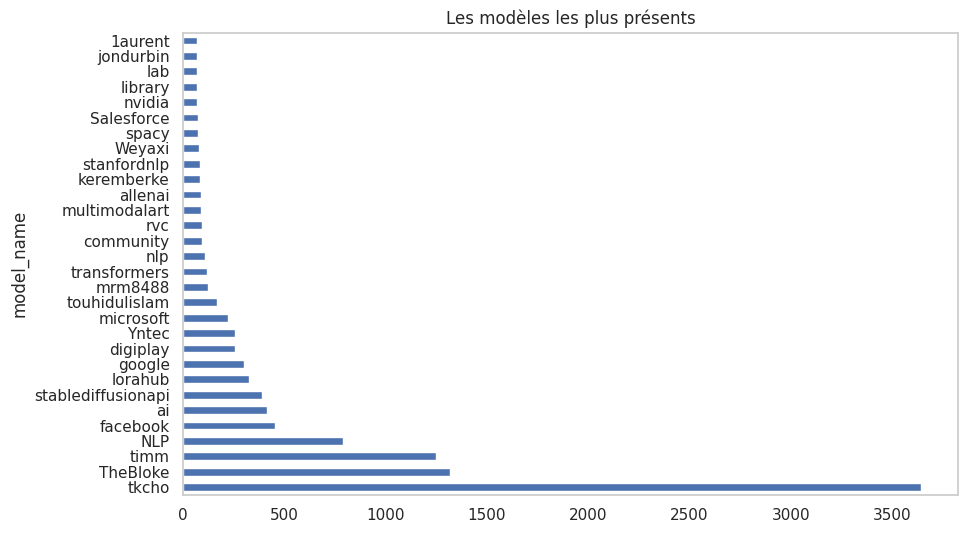

In [43]:
plt.figure(figsize=(10, 6))
model_name.value_counts().head(30).plot.barh(grid=False)
plt.title("Les modèles les plus présents")

##### Which models are the most present?

In [44]:
abt_model = df[['model_name', 'downloads']]
abt_model = abt_model.sort_values(by='downloads', ascending=False).head(20)
abt_model

,model_name,downloads
4976,pysentimiento,66990391
3943,jonatasgrosman,60679804
22700,Supabase,47702018
6091,cardiffnlp,47205553
4761,openai,44193559
16,NaN,36896219
40,NaN,21501386
37,NaN,19783506
43,NaN,12497235
3953,jonatasgrosman,12332564


In [60]:
filtered_abt_model = abt_model.dropna(subset=['model_name'])
filtered_abt_model = abt_model[~abt_model['model_name'].isna()]

filtered_abt_model

,model_name,downloads
4976,pysentimiento,66990391
3943,jonatasgrosman,60679804
22700,Supabase,47702018
6091,cardiffnlp,47205553
4761,openai,44193559
3953,jonatasgrosman,12332564
60,FacebookAI,11385910
6238,ai,11241385
6550,microsoft,10777619
17716,lxyuan,8509940


Text(0.5, 1.0, 'Les modèles les plus téléchargés')

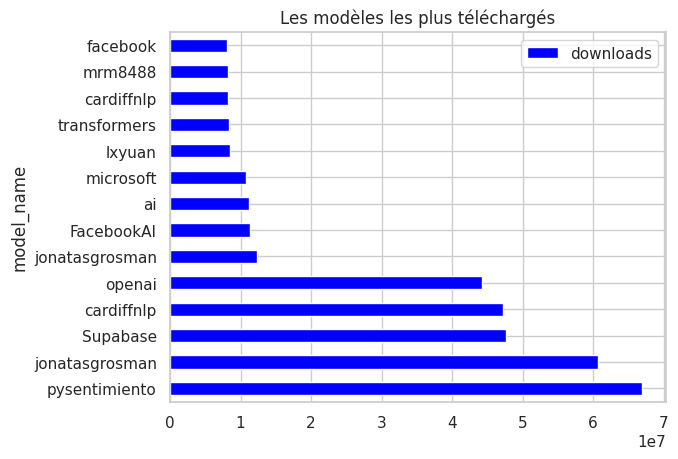

In [61]:
filtered_abt_model.plot.barh('model_name', 'downloads', color='blue')
plt.title("Les modèles les plus téléchargés")

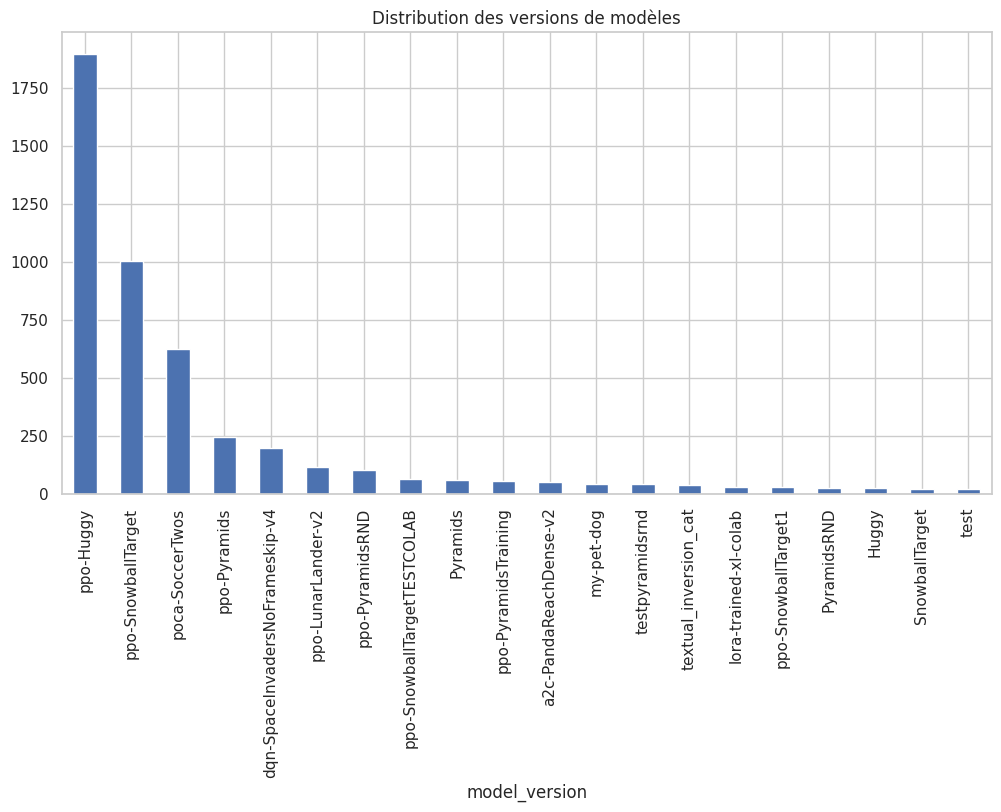

In [54]:
plt.figure(figsize=(12, 6))
df['model_version'].value_counts().head(20).plot(kind='bar')
plt.title('Distribution des versions de modèles')
plt.show()

##### What frameworks are used by models?

In [51]:
framework_counts = df[['framework_torch', 'framework_jax', 'framework_onnx', 'framework_tensorflow', 'framework_keras']].sum()
framework_counts

framework_torch         23244
framework_jax            1655
framework_onnx           5779
framework_tensorflow     2434
framework_keras           322
dtype: int64

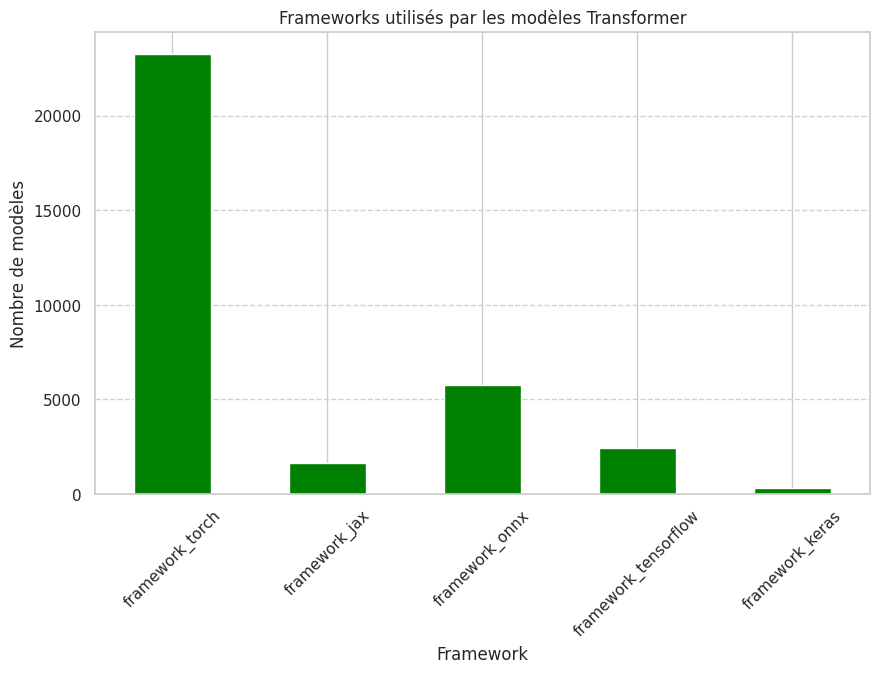

In [53]:
plt.figure(figsize=(10, 6))
framework_counts.plot(kind='bar', color='green')
plt.title('Frameworks utilisés par les modèles Transformer')
plt.xlabel('Framework')
plt.ylabel('Nombre de modèles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

#### 2. How does the size of the datasets available on the platform vary?

In [13]:
sns.set(style="whitegrid")
path = "./data_cleanup/clean_data.csv"

In [5]:
# 将时间列转换为时间格式,并且按照月份进行排列
def process_time(df):
    df['created_time'] = pd.to_datetime(df['created_at'])
    df['YM'] = df['created_time'].dt.to_period('M').astype(str)

In [6]:
# 作图
# 按列名进行对每个列中数据的整理,计算每个列中出现的个数,并将所有数据展示在一张图上
def show_count_per_month(df, cols):
    plt.figure(figsize=(12, 7))
    for col in cols:
        data = df[df[col] == 1].groupby('YM').size().cumsum().reset_index(name='count')
        sns.lineplot(x='YM', y='count', data=data, marker='o', label=col)
        # 对第一个,中间的点和最后一个点加上准确数值
        for i in [0,int(len(data)/2),len(data) - 1]:
            x = data.loc[i, 'YM']
            y = data.loc[i, 'count']
            plt.text(x, y, str(y), color='black', ha='center')
    plt.title("Cumulative Count per Month")
    plt.xlabel('Year-Month')
    plt.ylabel('Cumulative Count')
    plt.xticks(rotation=45)
    plt.legend(title='Series')
    plt.tight_layout()
    plt.show()

In [7]:
# 作图
# 按列名进行对每个列中数据的整理,计算每个列中出现的个数,再将对应的下载数量进行求和,并将所有数据展示在一张图上
def show_sum_per_month(df, cols):
    plt.figure(figsize=(12, 7))
    for col in cols:
        data = df[df[col] == 1].groupby('YM')['downloads'].sum().cumsum().reset_index(name='sum')
        sns.lineplot(x='YM', y='sum', data=data, marker='o', label=col)
        # 标记第一个和最后一个点
        for i in [0,int(len(data)/2),len(data) - 1]:
            x = data.loc[i, 'YM']
            y = data.loc[i, 'sum']
            plt.text(x, y, str(y), color='black', ha='center')
    plt.title("Cumulative Sum per Month")
    plt.xlabel('Year-Month')
    plt.ylabel('Cumulative Sum')
    plt.xticks(rotation=45)
    plt.legend(title='Series')
    plt.tight_layout()
    plt.show()

In [8]:
# 对统计数据进行单列的作图,并将所有图展示在一张图片上
def show_count_per_month_subplot(df, cols):
    n = len(cols)
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 5), dpi=100)  # 增大清晰度

    for idx, col in enumerate(cols):
        ax = axes[idx]  # 获取当前子图的轴
        data = df[df[col] == 1].groupby('YM').size().cumsum().reset_index(name='count')
        sns.lineplot(x='YM', y='count', data=data, marker='o', ax=ax)
        ax.set_title(col)
        ax.set_xlabel('Year-Month')
        ax.set_ylabel('Cumulative Count')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [9]:
def show_sum_per_month_subplot(df, cols):
    n = len(cols)
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 5), dpi=100)  # 增大宽度和DPI

    for idx, col in enumerate(cols):
        ax = axes[idx]  # 获取当前子图的轴
        data = df[df[col] == 1].groupby('YM')['downloads'].sum().cumsum().reset_index(name='sum')
        sns.lineplot(x='YM', y='sum', data=data, marker='o', ax=ax)
        ax.set_title(col)
        ax.set_xlabel('Year-Month')
        ax.set_ylabel('Cumulative Sum')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [10]:
# 对基础模型进行处理,计算出每个模型的数量,并建立 one-hot 编码
def analyse_base_model(df):
    bm = df['base_models'].value_counts()
    print(len(bm))
    models_name = bm.index.tolist()
    models_nb = bm.values.tolist()
    print(len(models_name))
    bms = ['distilbert', 'xlm-roberta', 'roberta','bert', 'llama', 'gpt2', 'mistral', 'timm', 't5', 'marian', 'bart', 'whisper','gpt3']
    bmm = [[] for i in bms]
    nbbm = [0 for i in bms]
    for i in range(len(models_name)):
        ll = models_name[i].split(',')
        for j in ll:
            for m in range(len(bms)):
                if bms[m] in j:
                    bmm[m].append(i)
                    break
    # print(bmm)
    for i in range(len(bmm)):
        for j in range(len(bmm[i])):
            nbbm[i] += models_nb[j]
    print(nbbm)
    base_models_dict = {}
    for i,j in zip(bms,nbbm):
        base_models_dict[i] = j
    base_models_dict = dict(sorted(base_models_dict.items(),key = lambda x:x[1]))
    plt.bar(base_models_dict.keys(),base_models_dict.values())
    plt.xticks(rotation=25)
    plt.show()
    return base_models_dict

In [11]:
def analyse_cols(df,cols):
    show_count_per_month(df, cols)
    show_count_per_month_subplot(df,cols)
    show_sum_per_month(df, cols)
    show_sum_per_month_subplot(df,cols)

In [14]:
df = pd.read_csv(path)
process_time(df)

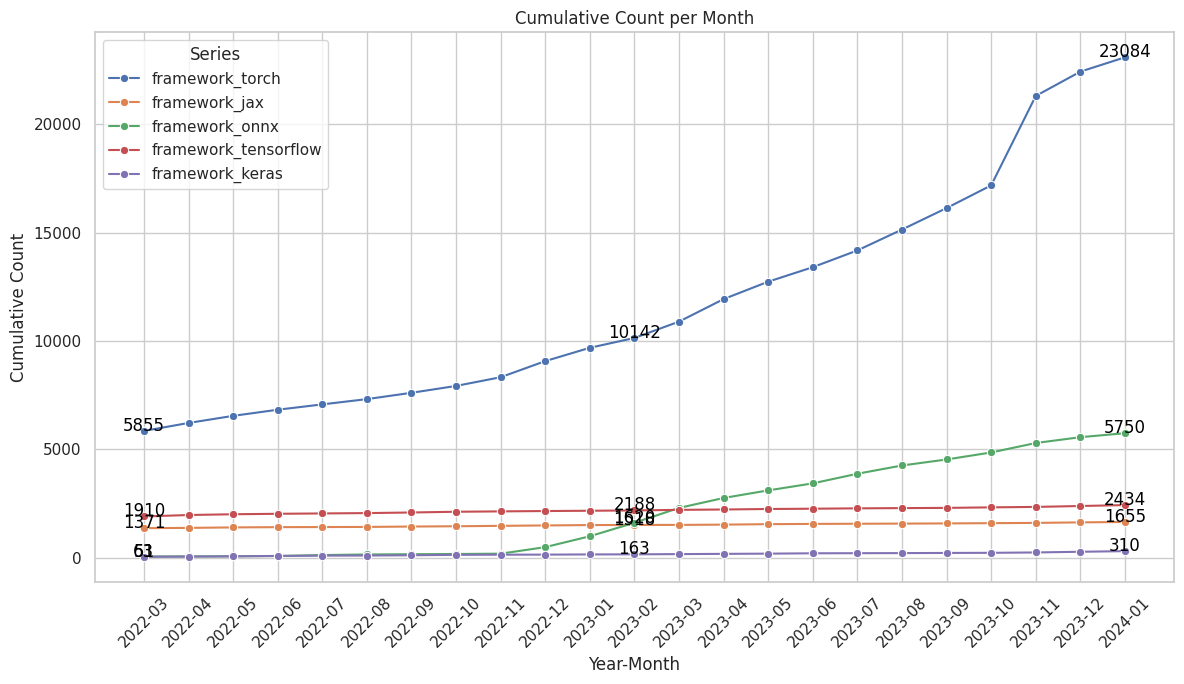

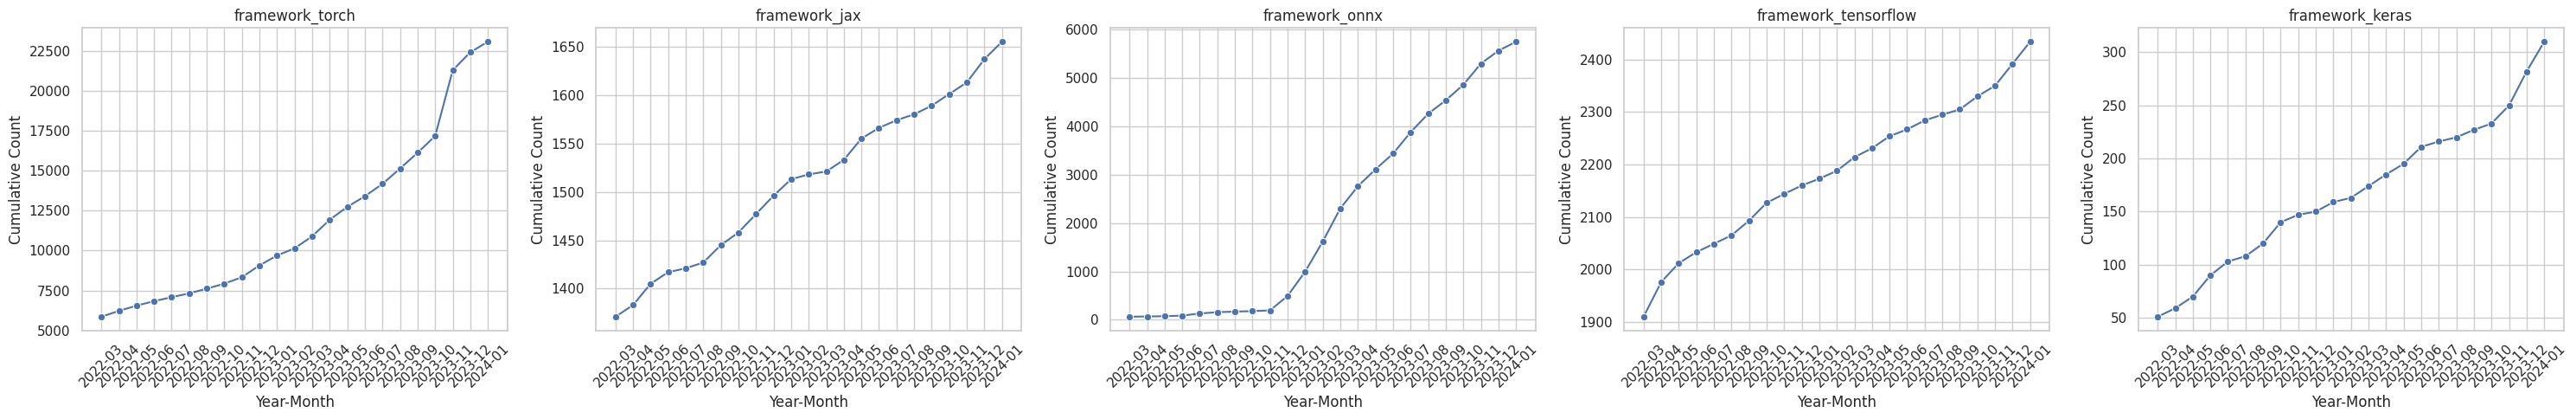

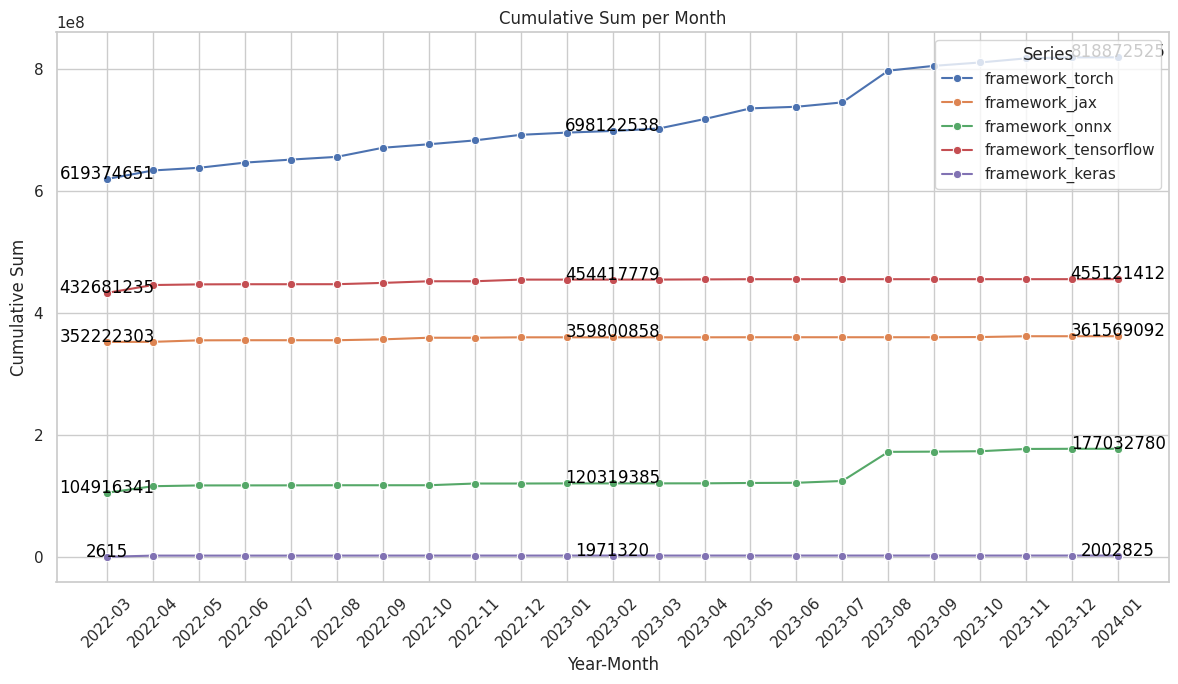

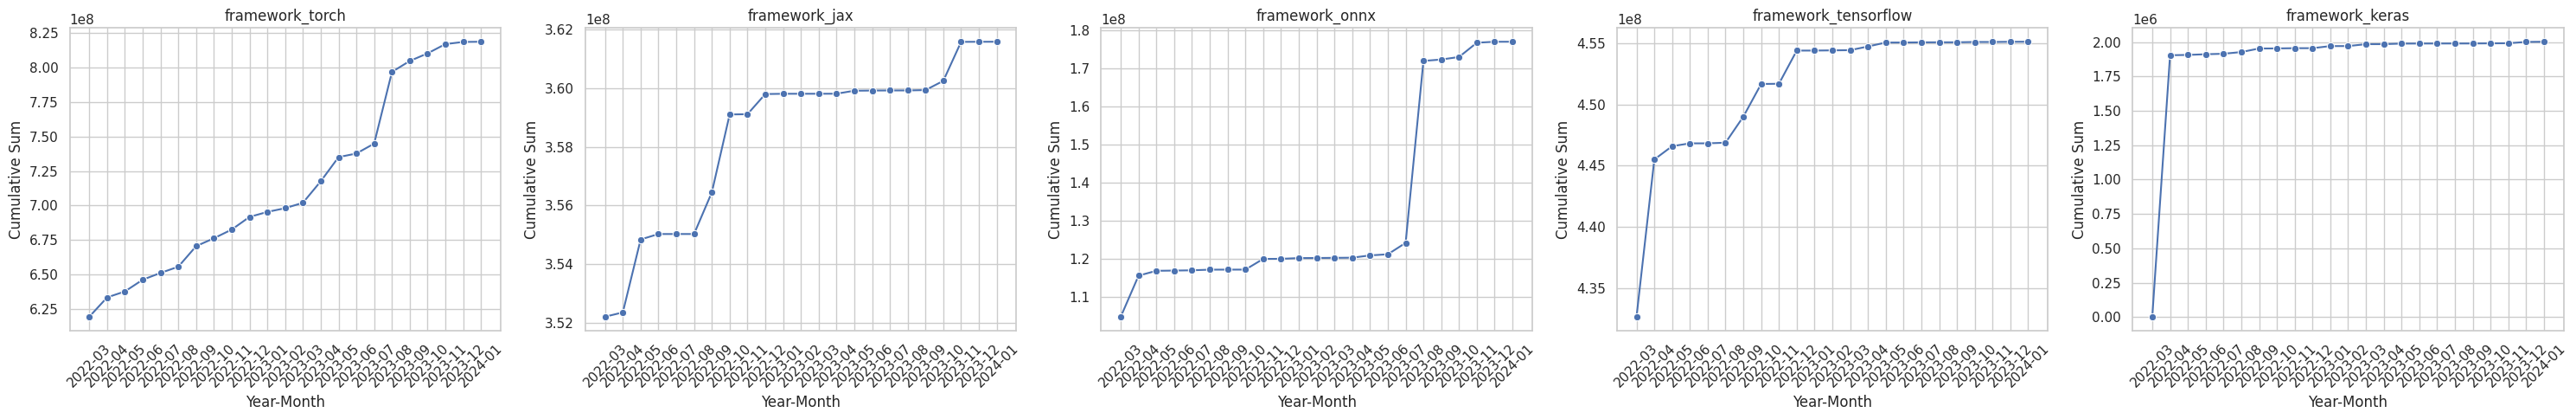

In [15]:
col_frameworks = ['framework_torch','framework_jax', 'framework_onnx', 'framework_tensorflow','framework_keras']
analyse_cols(df,col_frameworks)

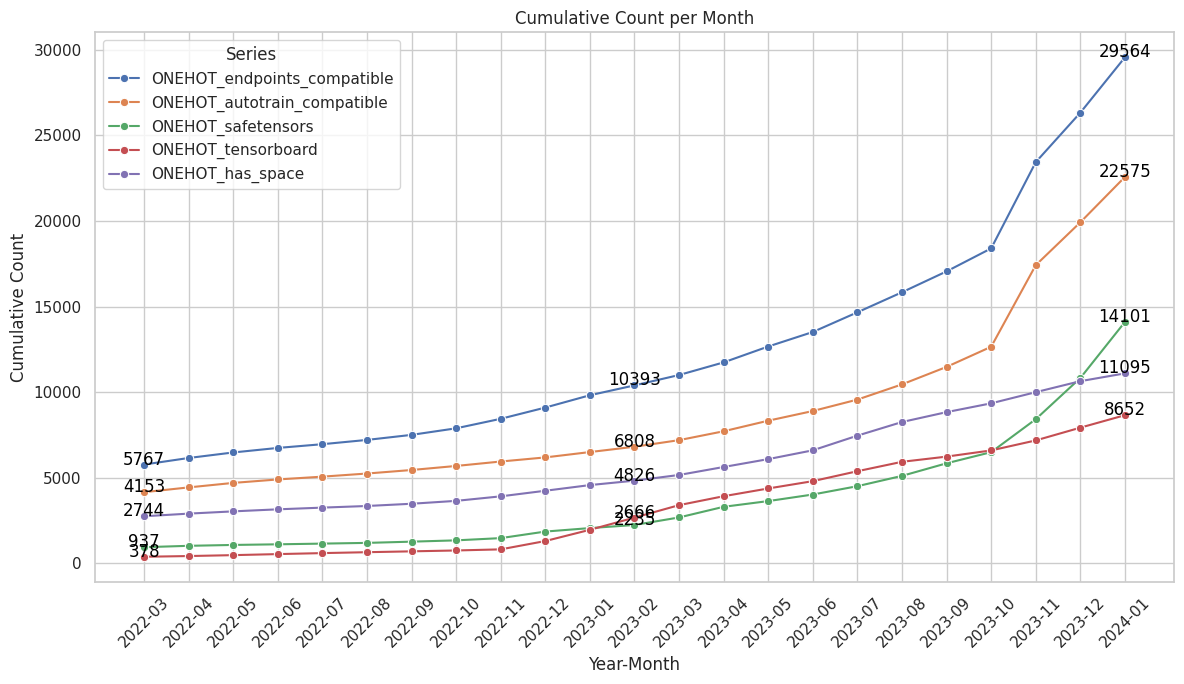

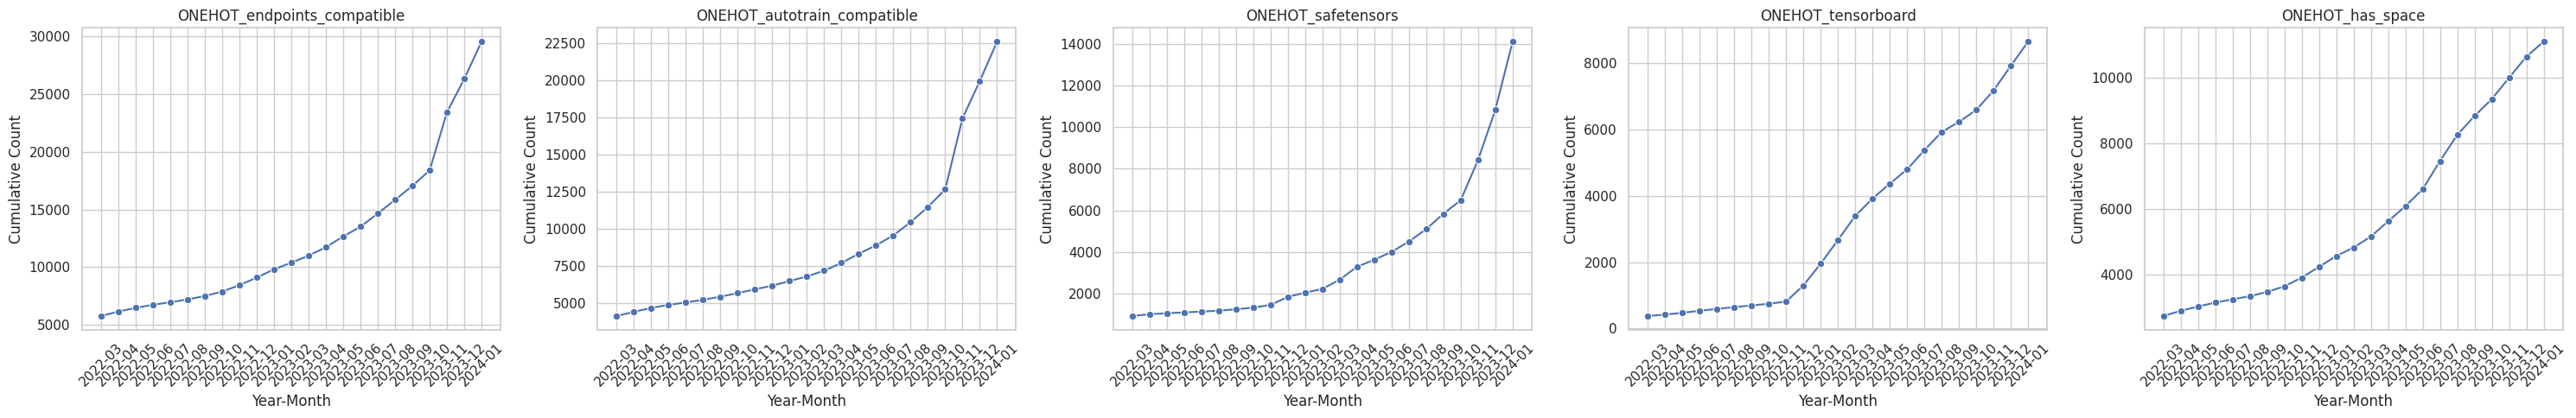

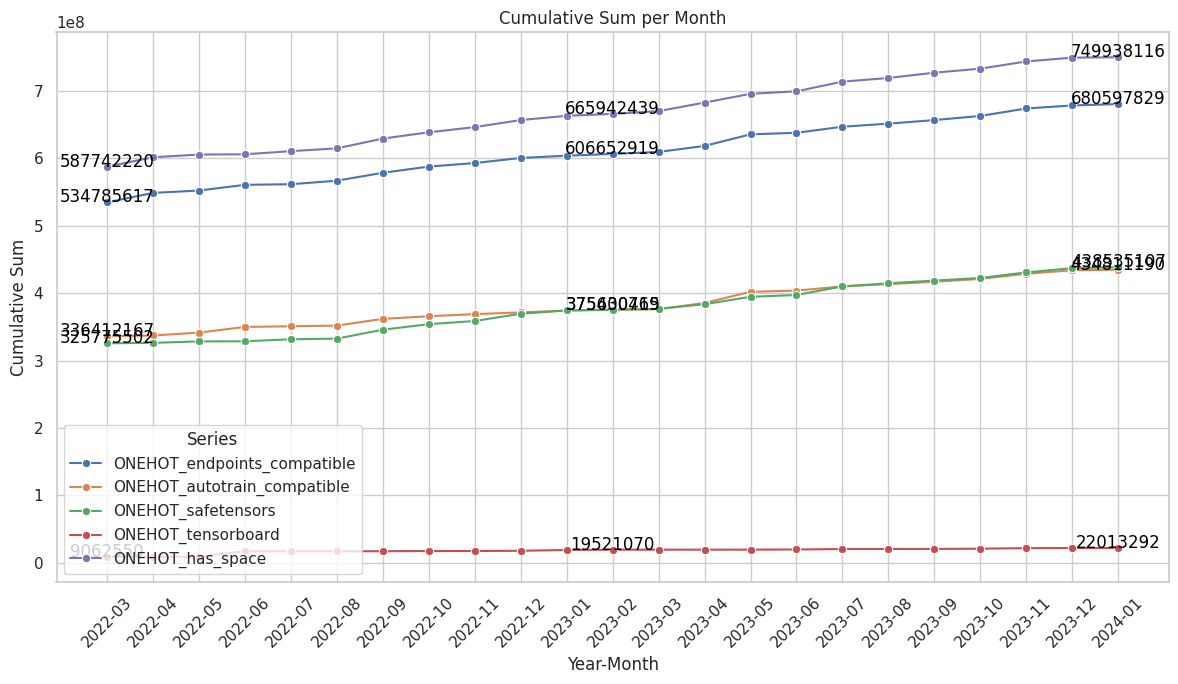

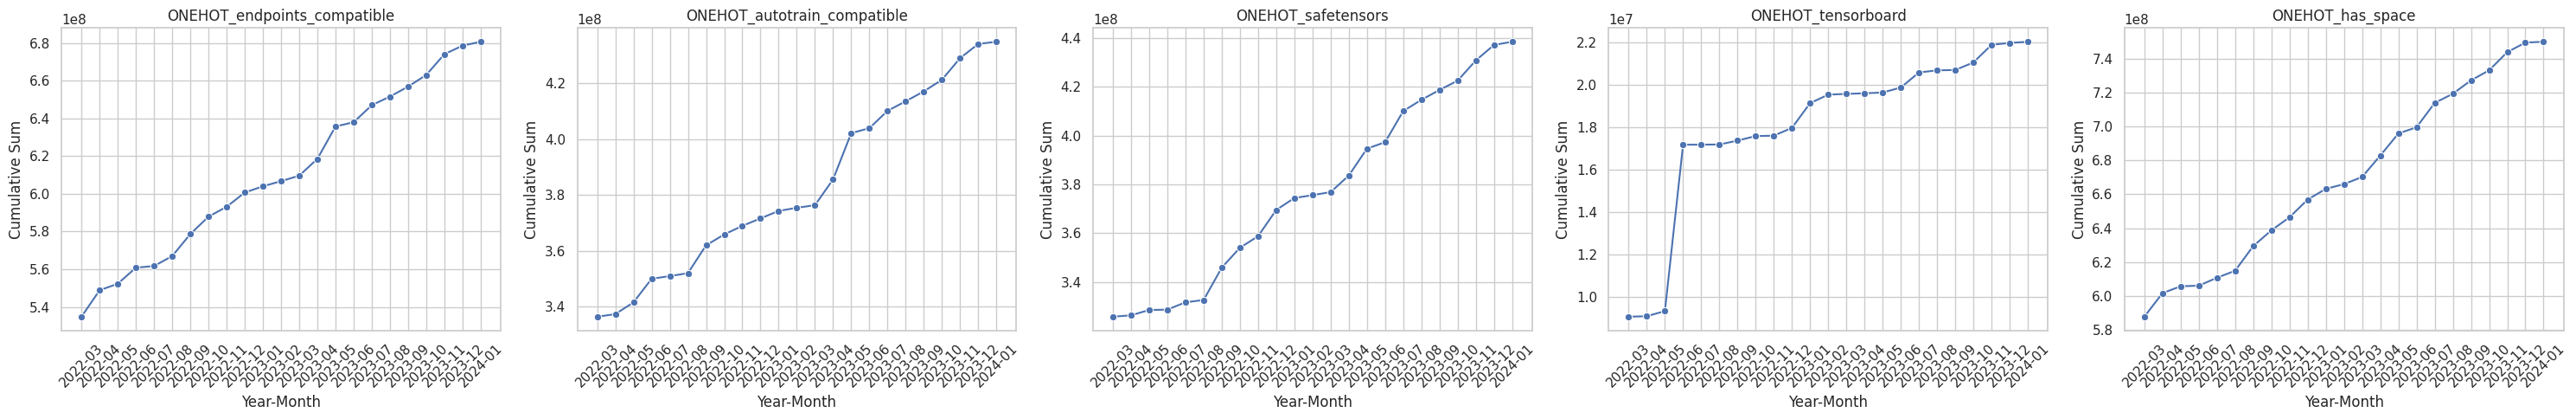

In [16]:
col_ONEHOT = ['ONEHOT_endpoints_compatible', 'ONEHOT_autotrain_compatible','ONEHOT_safetensors', 'ONEHOT_tensorboard', 'ONEHOT_has_space']
analyse_cols(df,col_ONEHOT)

#### 3. What are the emerging trends in terms of languages supported by models?

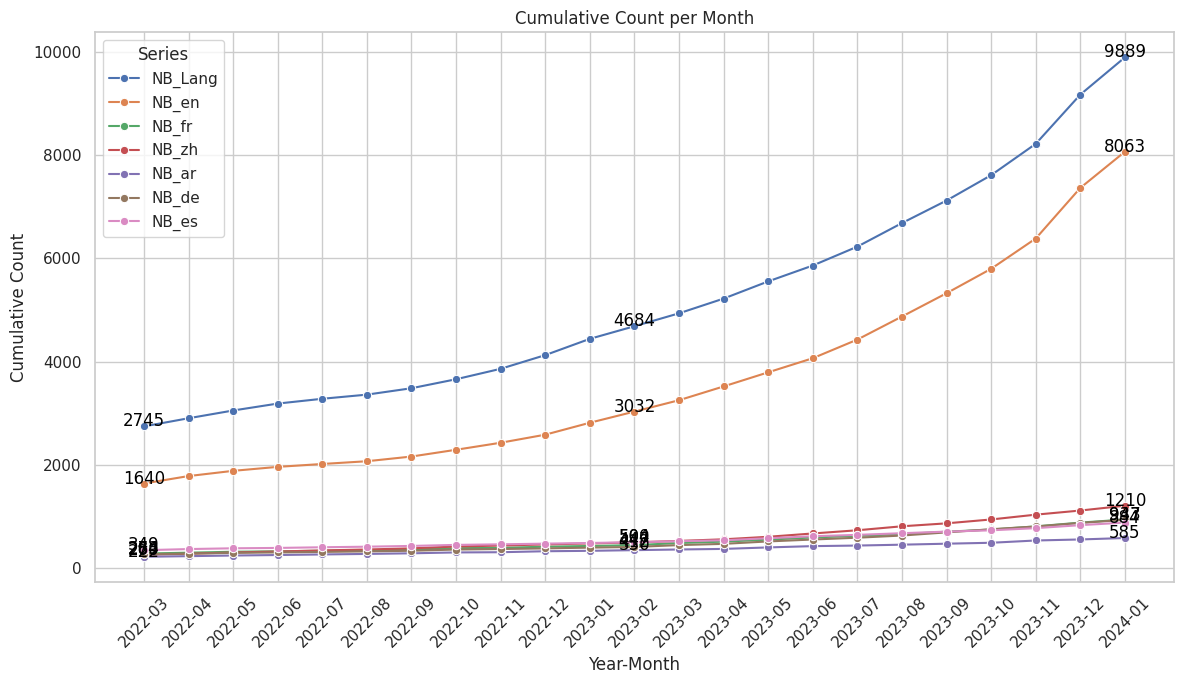

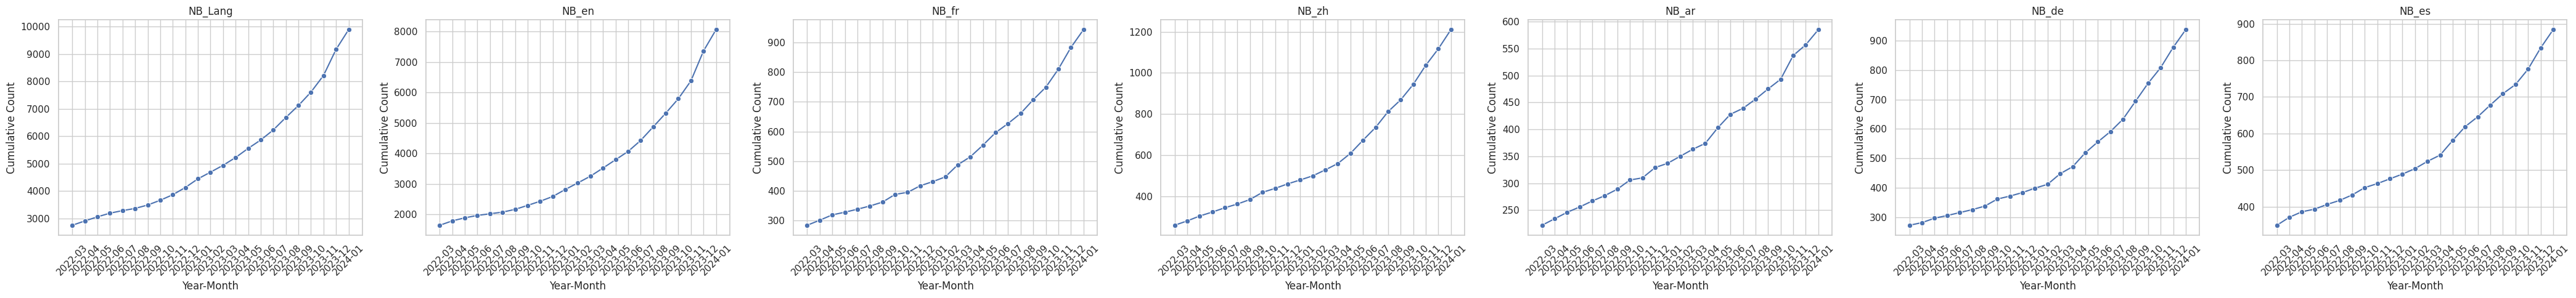

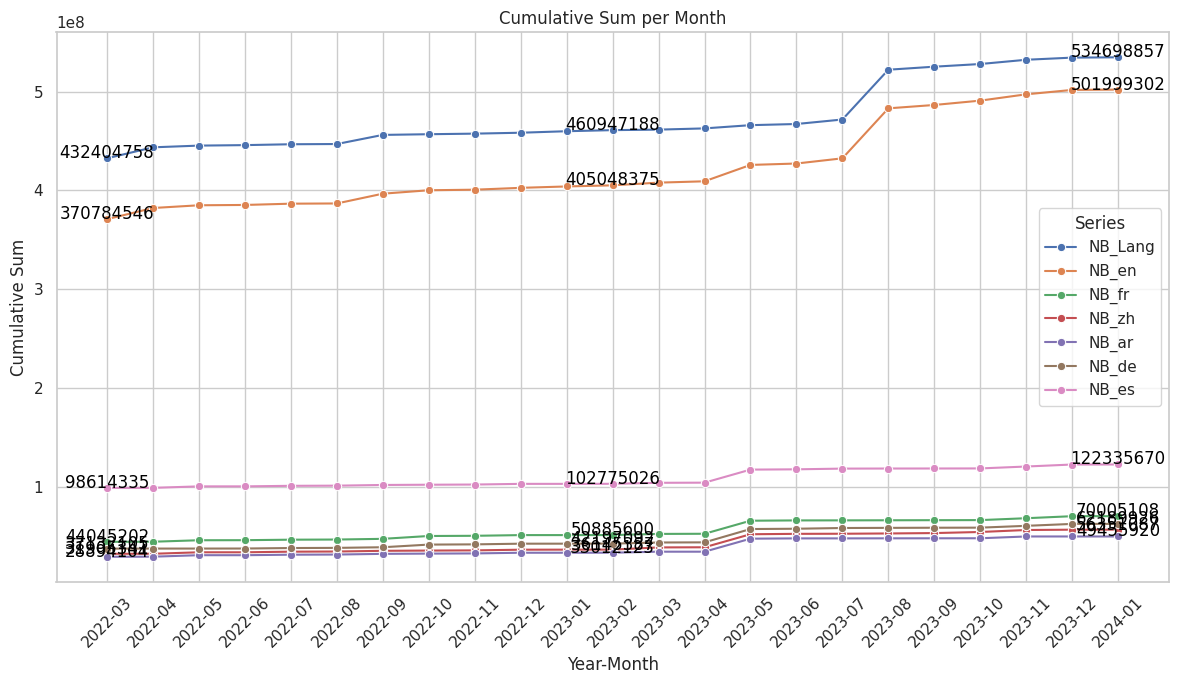

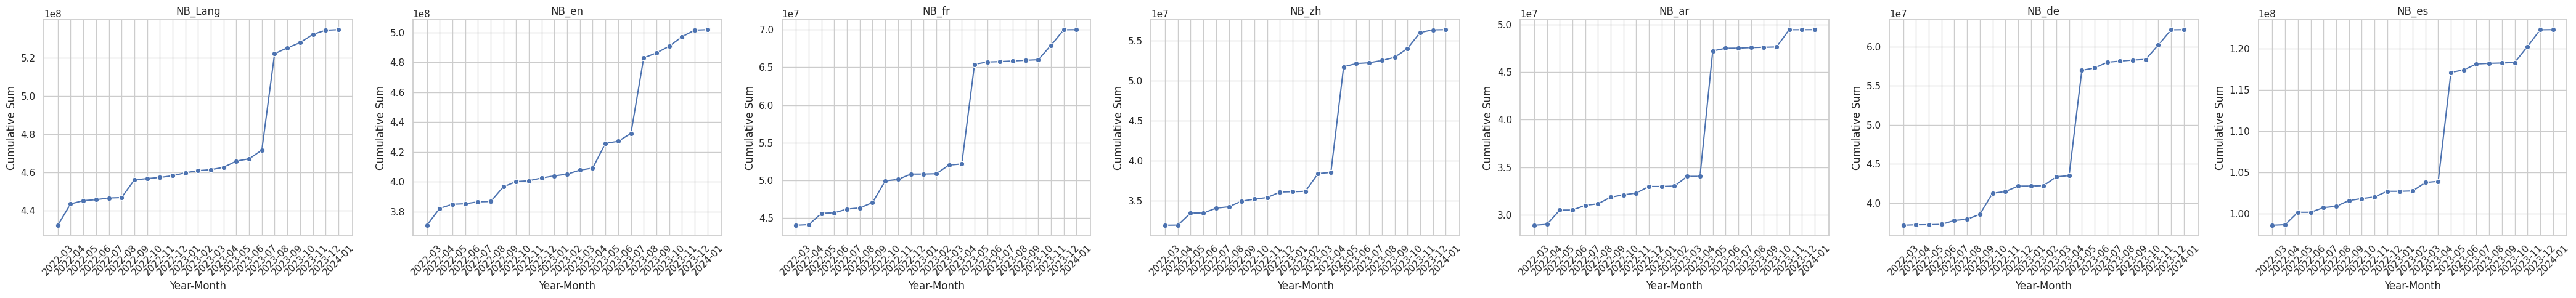

In [17]:
col_lang = ['NB_Lang','NB_en','NB_fr', 'NB_zh', 'NB_ar', 'NB_de', 'NB_es']
analyse_cols(df,col_lang)

688
688
[20439, 22787, 23778, 24749, 24266, 23577, 24016, 17904, 23717, 10964, 23256, 20439, 17904]


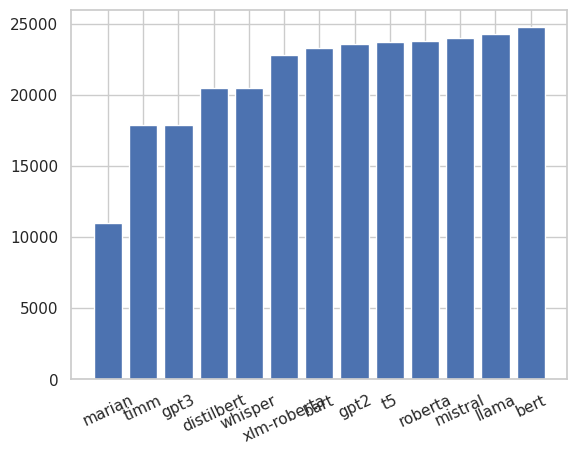

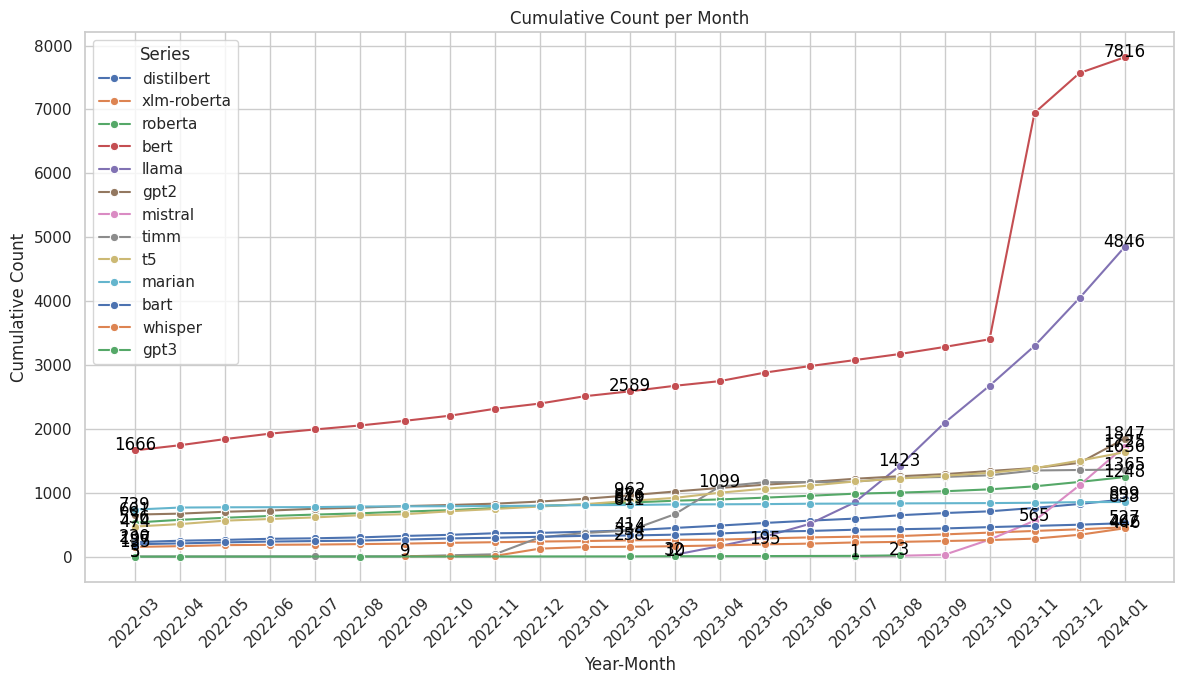

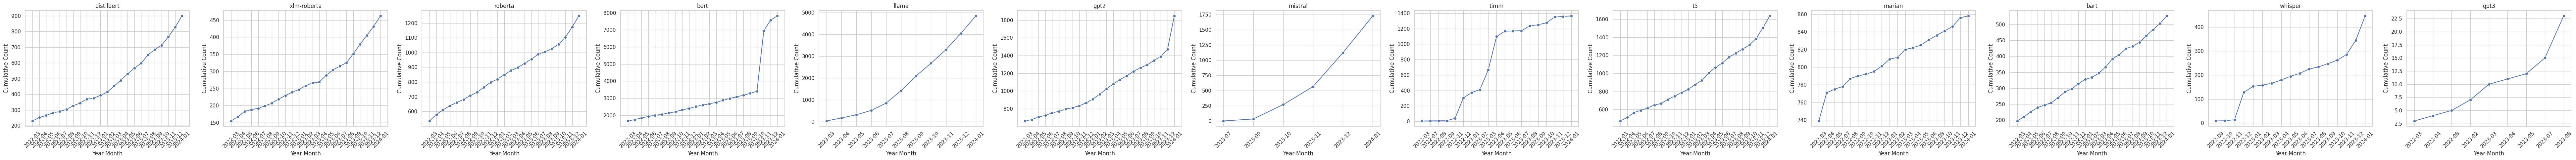

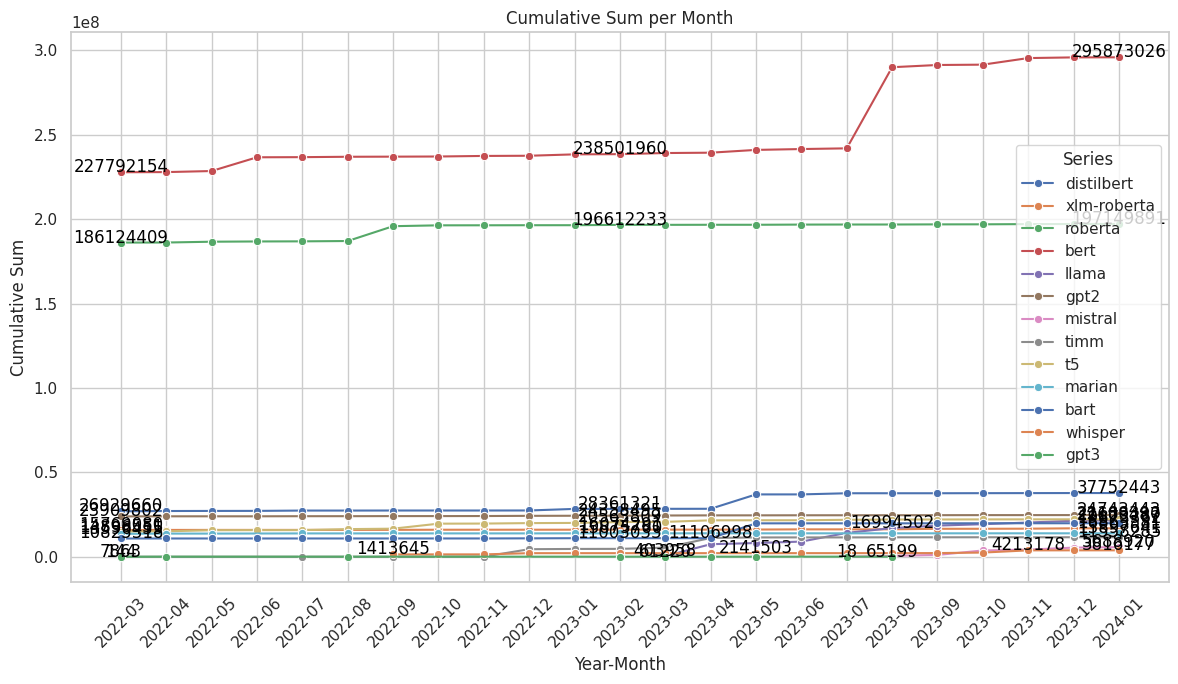

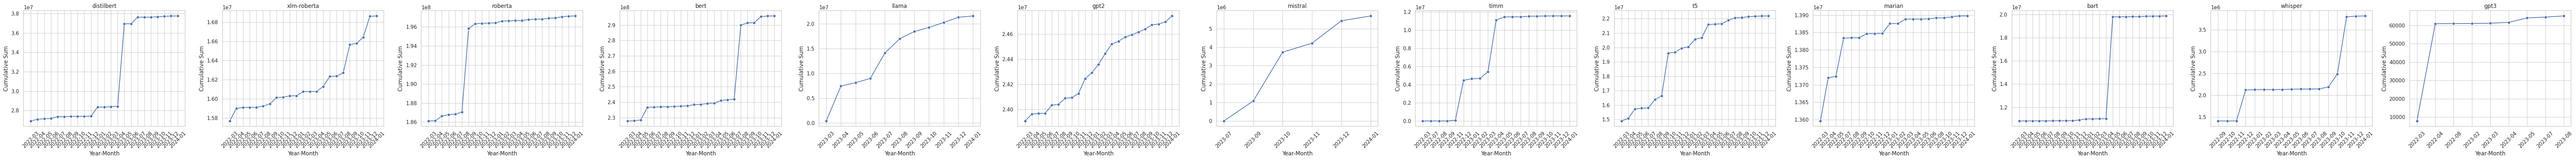

In [18]:
df = pd.read_csv(path)
bmd = analyse_base_model(df)
cols = ['created_at', 'downloads', 'likes','base_models']
df = df[cols]
process_time(df)
bms = ['distilbert', 'xlm-roberta', 'roberta','bert', 'llama', 'gpt2', 'mistral', 'timm', 't5', 'marian', 'bart', 'whisper','gpt3']
for i in bms:
    df[i] = 0
for i in range(len(df)):
    bm_content = df.iloc[i,3]

    if type(bm_content) != str :
        continue
    ll = bm_content.split(',')
    for l in ll:
        for j in range(len(bms)):
            if bms[j] in l:
                df.loc[i,bms[j]] = 1
                break

analyse_cols(df,bms)

#### 4. Which tasks are most commonly tackled by popular models ?

'model_name', 'created_at', 'tasks', 'NB_tasks'

In [22]:
df = pd.read_csv("./data_cleanup/clean_data.csv")

In [23]:
col_name = ['model_name','created_at','tasks','NB_tasks']
df = df[col_name]
df

,model_name,created_at,tasks,NB_tasks
0,albert,2022-03-02,fill-mask,1
1,albert,2022-03-02,fill-mask,1
2,albert,2022-03-02,fill-mask,1
3,albert,2022-03-02,fill-mask,1
4,albert,2022-03-02,fill-mask,1
...,...,...,...,...
44706,mmervecerit,2024-01-24,"vit,image-classification,generated_from_trainer",3
44707,jsfs11,2024-01-24,"text-generation,text-generation-inference",2
44708,PetroGPT,2024-01-24,"text-generation,text-generation-inference",2
44709,tinywell,2024-01-24,"ml-agents,huggy,deep-reinforcement-learning,re...",5


##### Which tasks are the most common ?

In [24]:
df = df.assign(tasks=df['tasks'].str.split(',')).explode('tasks')
task_counts = df['tasks'].value_counts().reset_index()
task_counts.columns = ['task', 'task_count']
task_counts = task_counts.sort_values(by='task_count', ascending=False)

print(task_counts)

                                     task  task_count
0               text-generation-inference       10889
1                         text-generation       10283
2                     text-classification        6745
3                               diffusers        6662
4                  reinforcement-learning        5925
..                                    ...         ...
654                  llava_stablelm_epoch           1
653                     classic animation           1
652                            text-2-sql           1
651                  inference-extraction           1
967  joint_aed_ctc_speech-encoder-decoder           1

[968 rows x 2 columns]


In [25]:
task_counts = task_counts[task_counts['task_count'] >= 500]
print(task_counts)

                             task  task_count
0       text-generation-inference       10889
1                 text-generation       10283
2             text-classification        6745
3                       diffusers        6662
4          reinforcement-learning        5925
5     deep-reinforcement-learning        5914
6                   text-to-image        5362
7                       ml-agents        5299
8                stable-diffusion        3668
9            text2text-generation        3181
10                    model-index        2770
11         generated_from_trainer        2672
12                ml-agents-huggy        2126
13                unity-ml-agents        2067
14           image-classification        1995
15     stable-diffusion-diffusers        1586
16                      fill-mask        1558
17             feature-extraction        1461
18                          huggy        1428
19           token-classification        1341
20       ml-agents-snowballtarget 

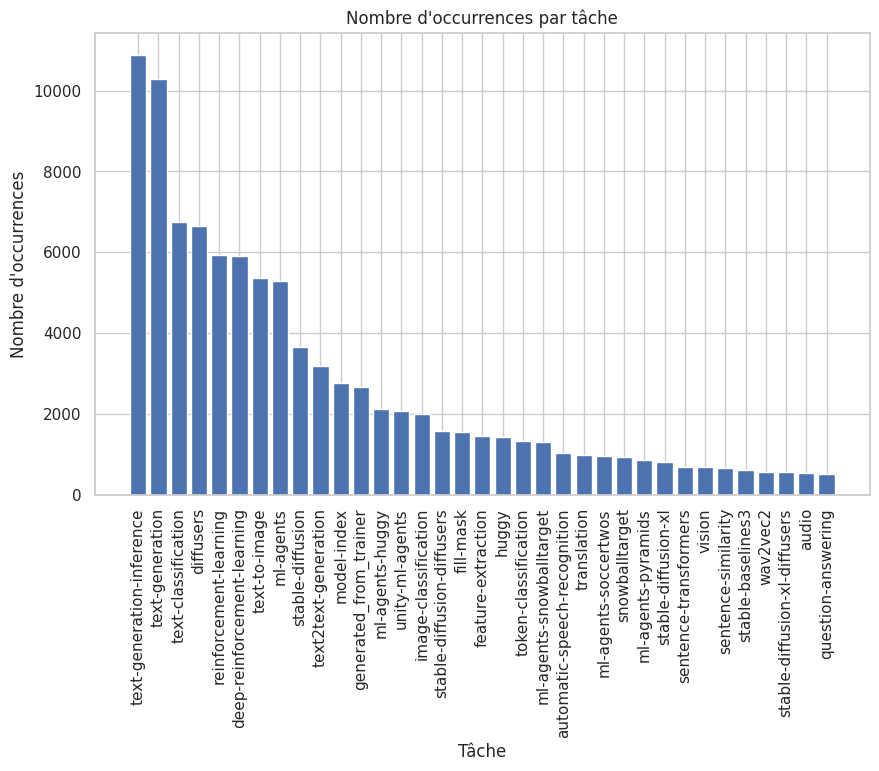

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(task_counts['task'], task_counts['task_count'])
plt.xlabel('Tâche')
plt.ylabel('Nombre d\'occurrences')
plt.title('Nombre d\'occurrences par tâche')
plt.xticks(rotation=90)
plt.show()

##### How many tasks do the models perform? 

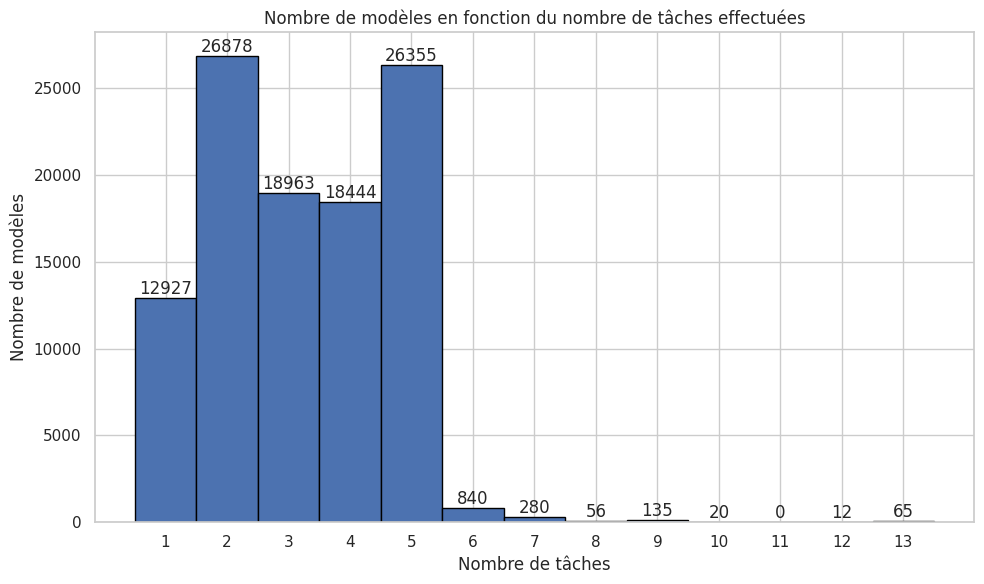

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df['NB_tasks'], bins=range(1, df['NB_tasks'].max() + 2), align='left', edgecolor='black')
plt.xlabel('Nombre de tâches')
plt.ylabel('Nombre de modèles')
plt.title('Nombre de modèles en fonction du nombre de tâches effectuées')
plt.xticks(range(1, df['NB_tasks'].max() + 1))
plt.grid(True)

for i in range(1, df['NB_tasks'].max() + 1):
    count = (df['NB_tasks'] == i).sum()
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### 5. Is there a correlation between model development period and it's popularity?

'model_name', 'created_at', 'download'

In [30]:
df = pd.read_csv("./data_cleanup/clean_data.csv")

In [31]:
col_name = ['model_name','created_at','downloads']
df = df[col_name]
df

,model_name,created_at,downloads
0,albert,2022-03-02,74335
1,albert,2022-03-02,2855580
2,albert,2022-03-02,1491
3,albert,2022-03-02,6875
4,albert,2022-03-02,1449
...,...,...,...
44706,mmervecerit,2024-01-24,11
44707,jsfs11,2024-01-24,18
44708,PetroGPT,2024-01-24,18
44709,tinywell,2024-01-24,25


In [32]:
df['created_at'] = pd.to_datetime(df['created_at'])

df['YM'] = df['created_at'].dt.to_period('M')

month_data = df.groupby('YM').agg({'downloads':'sum'})
month_data['cumulative_downloads'] = month_data['downloads'].cumsum()

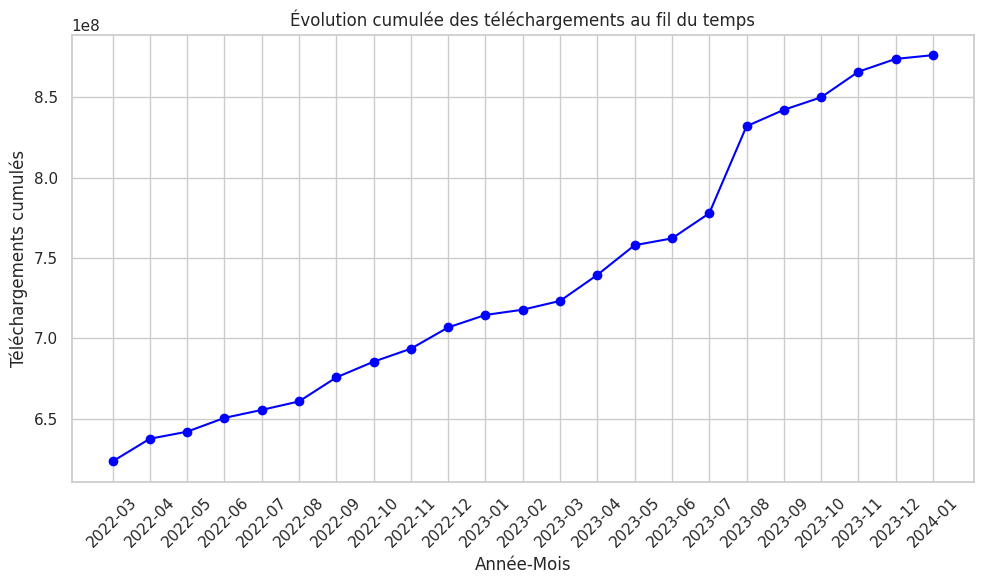

In [33]:
x_values = [str(p) for p in month_data.index]
y_values = month_data['cumulative_downloads'].tolist()

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='blue')
plt.title('Évolution cumulée des téléchargements au fil du temps')
plt.xlabel('Année-Mois')
plt.ylabel('Téléchargements cumulés')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()